# Case Study - 1 (Recruit Restaurant Visitor Forecasting)



### By Junaid Khan (junaidkhangec@gmail.com) 

# Exploratory Data Analysis 

## 1.Initialization

In [3]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import glob, re
import time, datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# set up root directory
official = 'data/official/'
weather = 'data/weather' 

In [3]:
# reading all data
air_visit_data = pd.read_csv(official + 'air_visit_data.csv')
air_store_info = pd.read_csv(official + 'air_store_info.csv')
air_reserve = pd.read_csv(official + 'air_reserve.csv')
hpg_store_info = pd.read_csv(official + 'hpg_store_info.csv')
hpg_reserve = pd.read_csv(official + 'hpg_reserve.csv')
date_info = pd.read_csv(official + 'date_info.csv')
store_id_relation = pd.read_csv(official + 'store_id_relation.csv')
sample_submission = pd.read_csv(official + 'sample_submission.csv')

## 2.Null Value Analysis

In [4]:
air_visit_data.isnull().sum()

air_store_id    0
visit_date      0
visitors        0
dtype: int64

In [5]:
air_store_info.isnull().sum()

air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64

In [6]:
air_reserve.isnull().sum()

air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [7]:
hpg_store_info.isnull().sum()

hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64

In [70]:
hpg_reserve.isnull().sum()

hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [71]:
date_info.isnull().sum()

calendar_date    0
day_of_week      0
holiday_flg      0
dtype: int64

In [72]:
store_id_relation.isnull().sum()

air_store_id    0
hpg_store_id    0
dtype: int64

In [73]:
sample_submission.isnull().sum()

id          0
visitors    0
dtype: int64

>**Observations:-**
>1. From the above outputs we can observe that there are no null values in the dataset.
>2. There is no need of performing any kind of missing data imputation.


## 3.Preprocessing

In [34]:
# preprocessing AIR visitors data
air_data = pd.merge(air_visit_data,air_store_info,how='left', on=['air_store_id']) # merging dataframes
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)  # renaming columns
air_data = pd.merge(air_data,date_info,how='left', on=['visit_date'])
air_data.sort_values(by='visit_date',ignore_index=True,inplace=True)
air_data['visit_date'] = pd.to_datetime(air_data['visit_date'])
air_data['day'] = air_data['visit_date'].dt.day
air_data['dow'] = air_data['visit_date'].dt.weekday
air_data['year'] = air_data['visit_date'].dt.year
air_data['month'] = air_data['visit_date'].dt.month
air_data['week'] = air_data['visit_date'].dt.week
air_data['quarter'] = air_data['visit_date'].dt.quarter
air_data['visit_date'] = air_data['visit_date'].dt.date
air_data.to_csv('air_data.csv',index=False)

In [35]:
# preprocessing AIR reservation data
air_reserve_data = pd.merge(air_reserve,air_store_info,how='left', on=['air_store_id'])
air_reserve_data.head()
air_reserve_data['visit_datetime'] = pd.to_datetime(air_reserve_data['visit_datetime'])
air_reserve_data['visit_hour'] = air_reserve_data['visit_datetime'].dt.hour
air_reserve_data['visit_date'] = air_reserve_data['visit_datetime'].dt.date
air_reserve_data['reserve_datetime'] = pd.to_datetime(air_reserve_data['reserve_datetime'])
air_reserve_data['reserve_hour'] = air_reserve_data['reserve_datetime'].dt.hour
air_reserve_data['reserve_date'] = air_reserve_data['reserve_datetime'].dt.date
#calculate reservation time difference 
air_reserve_data['res_vis_diff'] = air_reserve_data.apply(
        lambda d: (d['visit_date'] - d['reserve_date']).days, axis=1)
air_reserve_data.rename(columns={'reserve_visitors':'air_reserve_visitors'},inplace=True)
air_reserve_data.to_csv('air_reserve_data.csv',index=False)

In [36]:
# preprocessing HPG reservation data
hpg_reserve_data = pd.merge(hpg_reserve,store_id_relation,on=['hpg_store_id'],how='inner')
hpg_reserve_data = pd.merge(hpg_reserve_data,hpg_store_info,on=['hpg_store_id'],how='left')
hpg_reserve_data['visit_datetime'] = pd.to_datetime(hpg_reserve_data['visit_datetime'])
hpg_reserve_data['visit_hour'] = hpg_reserve_data['visit_datetime'].dt.hour
hpg_reserve_data['visit_date'] = hpg_reserve_data['visit_datetime'].dt.date
hpg_reserve_data['reserve_datetime'] = pd.to_datetime(hpg_reserve_data['reserve_datetime'])
hpg_reserve_data['reserve_hour'] = hpg_reserve_data['reserve_datetime'].dt.hour
hpg_reserve_data['reserve_date'] = hpg_reserve_data['reserve_datetime'].dt.date
#calculate reserve time difference 
hpg_reserve_data['res_vis_diff'] = hpg_reserve_data.apply(
        lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1)
hpg_reserve_data.rename(columns={'reserve_visitors':'hpg_reserve_visitors'},inplace=True)

hpg_reserve_data.to_csv('hpg_reserve_data.csv',index=False)

In [37]:
# preprocess sample_submission
sample_submission['air_store_id'] = sample_submission['id'].map(lambda x: '_'.join(x.split('_')[:2]))
sample_submission['visit_date'] = sample_submission['id'].map(lambda x: str(x).split('_')[2])
sample_submission['visit_date'] = pd.to_datetime(sample_submission['visit_date'])
sample_submission['day'] = sample_submission['visit_date'].dt.day
sample_submission['dow'] = sample_submission['visit_date'].dt.weekday
sample_submission['dow_name'] = sample_submission['visit_date'].dt.day_name()
sample_submission['year'] = sample_submission['visit_date'].dt.year
sample_submission['month'] = sample_submission['visit_date'].dt.month
sample_submission['week'] = sample_submission['visit_date'].dt.week
sample_submission['quarter'] = sample_submission['visit_date'].dt.quarter
sample_submission['visit_date'] = sample_submission['visit_date'].dt.date
sample_submission.to_csv('sample_submission.csv',index=False)

In [38]:
total_air_reserve = air_reserve_data.groupby(['air_store_id','visit_date'],as_index=False)['air_reserve_visitors'].sum()
total_hpg_reserve =  hpg_reserve_data.groupby(['air_store_id','visit_date'],as_index=False)['hpg_reserve_visitors'].sum()
air_data = pd.merge(air_data,total_air_reserve,on=['air_store_id','visit_date'],how='left')
air_data = pd.merge(air_data,total_hpg_reserve,on=['air_store_id','visit_date'],how='left')
air_data.fillna(value=0,inplace=True)

## 4. Basic Overview

In [39]:
print("Training dataset overview\n\n")
print("Total number of unique AIR restaurants:-",len(air_visit_data.air_store_id.unique()))
print("Total restaurants common in AIR and HPG:-",len(store_id_relation))
print("Total unique genre in AIR restaurants:-",len(air_store_info.air_genre_name.unique()))
print("Total number of AIR restaurant's locations",len(air_store_info.air_area_name.unique()))
print("Average daily visitors:-",air_visit_data.visitors.mean())
print("Training data duration:-{} to {}\n\n\n".format(air_visit_data.visit_date.min(),air_visit_data.visit_date.max()))

print("Test dataset overview\n\n")
print("Total unique restaurants:-",len(sample_submission.air_store_id.unique()))
print("Test data duration:-{} to {}".format(sample_submission.visit_date.min(),sample_submission.visit_date.max()))

Training dataset overview


Total number of unique AIR restaurants:- 829
Total restaurants common in AIR and HPG:- 150
Total unique genre in AIR restaurants:- 14
Total number of AIR restaurant's locations 103
Average daily visitors:- 20.973761245180636
Training data duration:-2016-01-01 to 2017-04-22



Test dataset overview


Total unique restaurants:- 821
Test data duration:-2017-04-23 to 2017-05-31


>### Observations:-
>**Training Dataset Overview:-** 
>1. Total number of unique AIR restaurants:- **829**    
>2. Total restaurants common in AIR and HPG:- **150**
>3. Total unique genre in AIR restaurants:- **14** 
>4. Total number of AIR restaurant's locations:- **103**
>5. Average daily visitors:- **20.973761245180636**
>6. Training data duration:-**2016-01-01 to 2017-04-22**

>**Test Dataset Overview:-**
>1. Total unique restaurants:- **821**
>2. Test data duration:- **2017-04-23 to 2017-05-31**

## 5.Detecting Multicolinearity using VIF (Variable Inflation Factors)

In [40]:
# label encoding categorical features
lb = LabelEncoder()
temp = air_data.copy()
temp['air_genre_name'] = lb.fit_transform(air_data['air_genre_name'])
temp['air_area_name'] =lb.fit_transform(air_data['air_area_name'])

In [41]:
# function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
# calculating VIF
VIF = calc_vif(temp.drop(columns=['air_store_id','visitors','visit_date','day_of_week']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables          VIF
3              longitude  5302.495301
7                   year  2753.585287
2               latitude   781.280280
8                  month   334.169366
9                   week   245.856323
10               quarter   100.678712
1          air_area_name     7.994980
5                    day     5.724121
0         air_genre_name     3.948267
6                    dow     3.518413
11  air_reserve_visitors     1.105963
4            holiday_flg     1.093103
12  hpg_reserve_visitors     1.066087

In [47]:
# recalculating VIF's by removing collinear feature 'longitude'
VIF = calc_vif(temp.drop(columns=['air_store_id',
                                      'visitors',
                                      'visit_date',
                                      'day_of_week',
                                      'longitude']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables         VIF
7                  month  334.162112
6                   year  321.002390
2               latitude  309.061122
8                   week  245.854166
9                quarter  100.678026
4                    day    5.724091
0         air_genre_name    3.945918
1          air_area_name    3.722507
5                    dow    3.517127
10  air_reserve_visitors    1.105297
3            holiday_flg    1.092800
11  hpg_reserve_visitors    1.065348

In [48]:
# recalculating VIF's by removing collinear feature 'month'
VIF = calc_vif(temp.drop(columns=['air_store_id',
                                      'visitors',
                                      'visit_date',
                                      'day_of_week',
                                      'longitude',
                                        'month']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables         VIF
6                   year  319.749068
2               latitude  309.059326
8                quarter   82.056151
7                   week   55.712191
4                    day    4.575379
0         air_genre_name    3.945916
1          air_area_name    3.722222
5                    dow    3.500130
9   air_reserve_visitors    1.104985
3            holiday_flg    1.075618
10  hpg_reserve_visitors    1.065166

In [49]:
# recalculating VIF's by removing collinear feature 'year'
VIF = calc_vif(temp.drop(columns=['air_store_id',
                                      'visitors',
                                      'visit_date',
                                      'day_of_week',
                                      'longitude',
                                         'month',
                                         'year']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables        VIF
7               quarter  80.661234
6                  week  55.038392
2              latitude  20.361178
4                   day   4.499474
0        air_genre_name   3.945191
1         air_area_name   3.707261
5                   dow   3.474924
8  air_reserve_visitors   1.102609
3           holiday_flg   1.075022
9  hpg_reserve_visitors   1.064790

In [50]:
# recalculating VIF's by removing collinear feature 'quarter'
VIF = calc_vif(temp.drop(columns=['air_store_id',
                                      'visitors',
                                      'visit_date',
                                      'day_of_week',
                                      'longitude',
                                         'month',
                                         'year',
                                         'quarter']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables        VIF
2              latitude  14.730309
4                   day   4.216444
0        air_genre_name   3.945082
1         air_area_name   3.707072
6                  week   3.470869
5                   dow   3.457107
7  air_reserve_visitors   1.099952
8  hpg_reserve_visitors   1.064293
3           holiday_flg   1.063706

In [51]:
# recalculating VIF's by removing collinear feature 'latitude'
VIF = calc_vif(temp.drop(columns=['air_store_id',
                                      'visitors',
                                      'visit_date',
                                      'day_of_week',
                                      'longitude',
                                      'latitude',
                                      'year',
                                      'month',
                                      'quarter']))
VIF.sort_values(ascending=False,inplace=True,by='VIF')
VIF

variables       VIF
3                   day  3.421799
0        air_genre_name  3.068475
5                  week  2.997176
1         air_area_name  2.963555
4                   dow  2.850071
6  air_reserve_visitors  1.097910
7  hpg_reserve_visitors  1.064197
2           holiday_flg  1.060769

>**Observations:-**
>1. From the above calculated VIF, we can observe that the VIF values of following features are quite high:-<br>
>**a) longitude<br>
>b) year<br>
>c) latitude<br>
>d) month<br> 
>e) week<br>
>f) quarter<br>**
>2. High VIF's of above features indicate that above features are highly collinear    
>3. On removing highly collinear features we can observe that the VIF values are decreased.
>4. Now the VIF values are in the acceptable range (i.e <5).

## 6.Univariate Analysis

### 6.1 Visitors Analyis 

#### 6.1.1 PDF of average visitors per restaurant

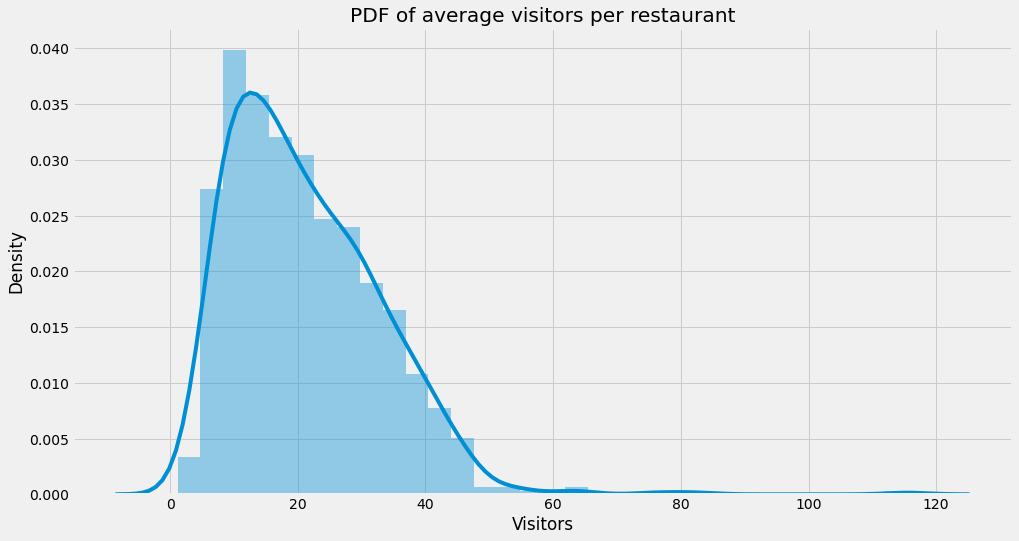

In [31]:
temp = air_data.groupby(['air_store_id'])['visitors'].mean().to_frame()

f,ax = plt.subplots(1,1, figsize=(15,8))
sns.distplot(a=temp.visitors.values, ax=ax)
plt.xlabel('Visitors')
plt.ylabel('Density')
plt.title('PDF of average visitors per restaurant')
plt.show()

>**Observations:-**
>1. The PDF of Average Visitors Per Restaurant is almost normal(approx) with mean visitosr 20.97, with a slight right skewness .
>2. We can use 68-95-99.7 rule to get rid of extreme outliers on the basis of standard deviations.
>3. There are a large number of restaurants which have capacity less than 20.

#### 6.1.2 CDF of of average visitors per restaurant

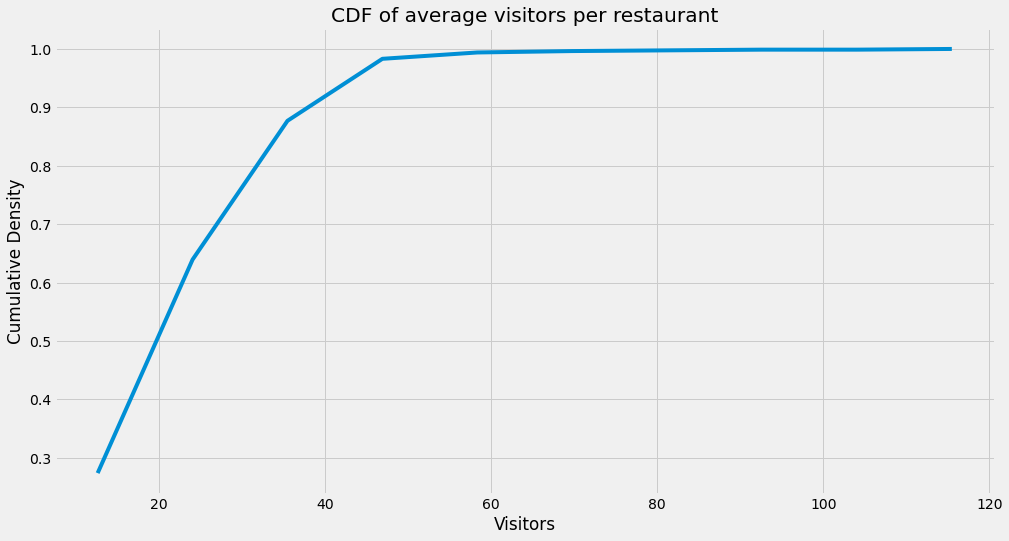

In [40]:
f,ax = plt.subplots(1,1, figsize=(15,8))
counts, bin_edges = np.histogram(temp['visitors'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))#cal pdf
cdf = np.cumsum(pdf)#cumulative sum of pdf,calculating cdf
plt.plot(bin_edges[1:], cdf)
plt.ylabel('Cumulative Density')
plt.xlabel('Visitors')
plt.title('CDF of average visitors per restaurant')
plt.show()

>**Observations:-**
>1. In the above CDF, we can observe that almost 99% restaurants have less than 47 (approx) average visitors.
>2. Almost 90% of the restaurants have less than 40 visitors/day.
>3. It explains the fact that there a large number number of small restaurants in Japan.
>4. There is negligible number restaurants which have average visitors capacity more than 100.

#### 6.1.3 Boxplot of average visitors per restaurant

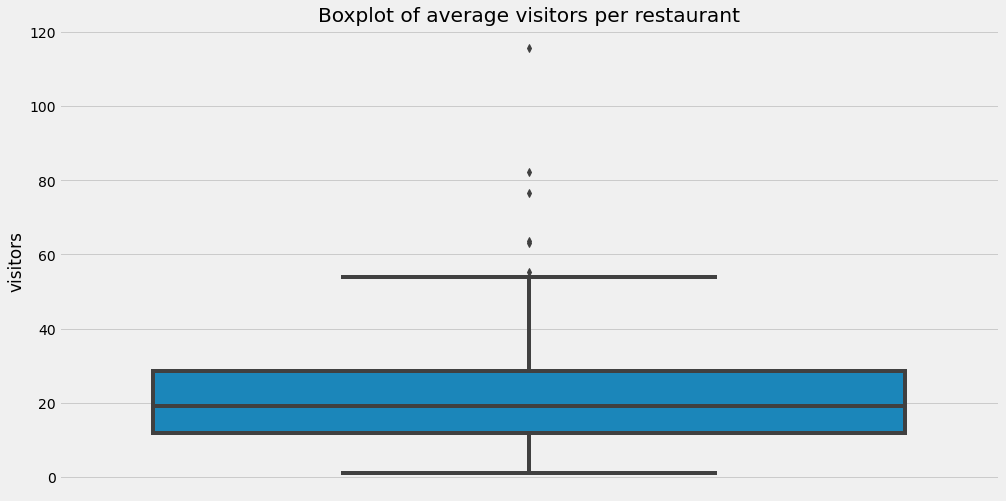

In [41]:
f,ax = plt.subplots(1,1, figsize=(15,8))
sns.boxplot(y='visitors', data=temp,ax=ax)
plt.title('Boxplot of average visitors per restaurant')
plt.show()

>**Observations:-**
>1. The minimum of visitors that we can observe from this plot is almost reaching zero.
>2. The mean of the visitors is  20(approx).
>3. The maximum number of visitors is between 55-60.
>4. We observe certain very high values (outlier) greater than 60 and and even greater than 100 visitors.
>5. 25th percentile and 75th percentile values are 13(approx) and 30(approx) respectively.

### 6.2 Reservations Analysis

#### 6.2.1 PDF of average visitors reservation per restaurant

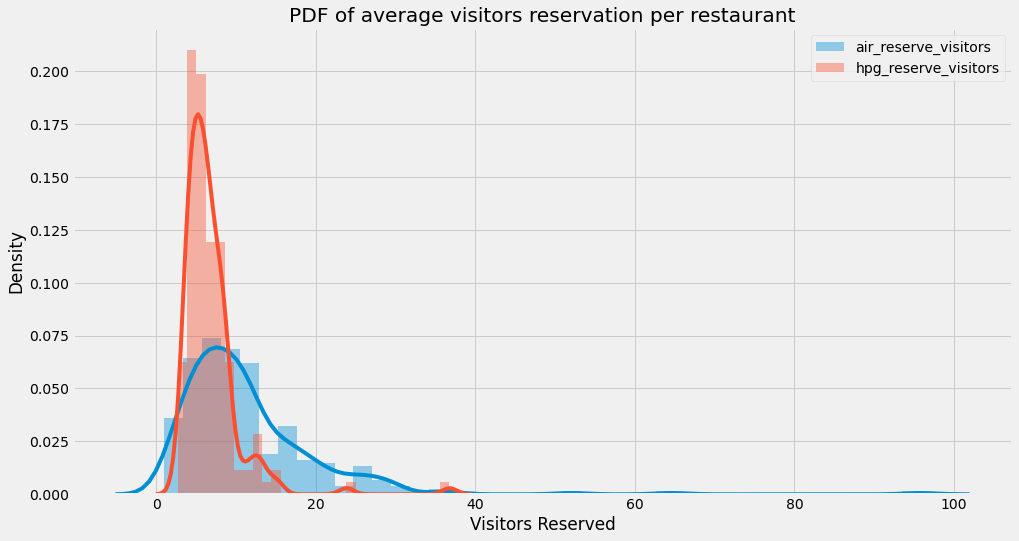

In [11]:
temp_1 = total_air_reserve.groupby(['air_store_id'],as_index=False)['air_reserve_visitors'].mean()
temp_2 = total_hpg_reserve.groupby(['air_store_id'],as_index=False)['hpg_reserve_visitors'].mean()

f,ax = plt.subplots(1,1, figsize=(15,8))
sns.distplot(a=temp_1.air_reserve_visitors.values, ax=ax, label='air_reserve_visitors')
sns.distplot(a=temp_2.hpg_reserve_visitors.values, ax=ax, label='hpg_reserve_visitors')
plt.xlabel('Visitors Reserved')
plt.ylabel('Density')
plt.legend()
plt.title('PDF of average visitors reservation per restaurant')
plt.show()

>**Observations:**
>1. The spread of AIR reservations is higher than that of HPG reservations.
>2. There is a large number of reservations in HPG with visitors count between 5 to 10.
>3. There are few reservations in HPG where the visitors count is more than 20 or even reaching 40.
>4. Even in AIR, the maximum number of visitors registered is 40, but the number of registrations are more than that of HPG.
>5. In AIR, maximum number of registrations have visitores count between 8 to 13 (approx).
>6. The number of unregistered visitors is far more than the number of registered visitors.

#### 6.2.2 CDF of average visitors reservation per restaurant

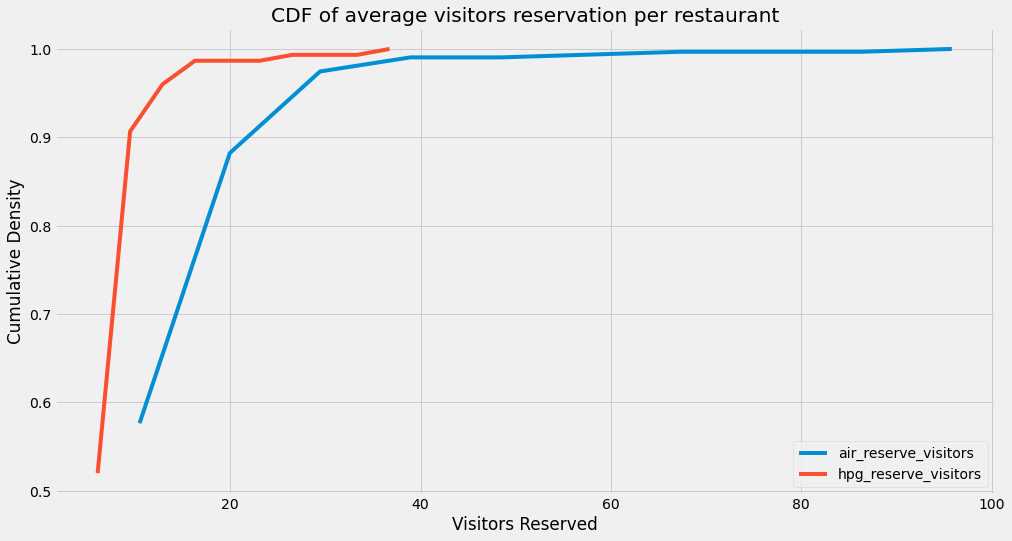

In [11]:
f,ax = plt.subplots(1,1, figsize=(15,8))
counts, bin_edges = np.histogram(temp_1['air_reserve_visitors'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))#cal pdf
cdf = np.cumsum(pdf)#cumulative sum of pdf,calculating cdf
plt.plot(bin_edges[1:], cdf,label='air_reserve_visitors')

counts, bin_edges = np.histogram(temp_2['hpg_reserve_visitors'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))#cal pdf
cdf = np.cumsum(pdf)#cumulative sum of pdf,calculating cdf
plt.plot(bin_edges[1:], cdf,label='hpg_reserve_visitors')
plt.ylabel('Cumulative Density')
plt.xlabel('Visitors Reserved')
plt.legend()
plt.title('CDF of average visitors reservation per restaurant')
plt.show()

>**Observations:-**
>1. form the above CDF,In AIR, almost 99% of per restaurant reservation is less than 40.
>2. In AIR, negligible number of reservations are greater than 60.
>3. In HPG, almost all reservations count is less than 40.
>4. In HPG, approx 99% of the reservations count are less than 20.
>5. In HPG, almost 90% of reservations are less han or equal to 10.

#### 6.2.3 Boxplot of average visitors reservation per restaurant

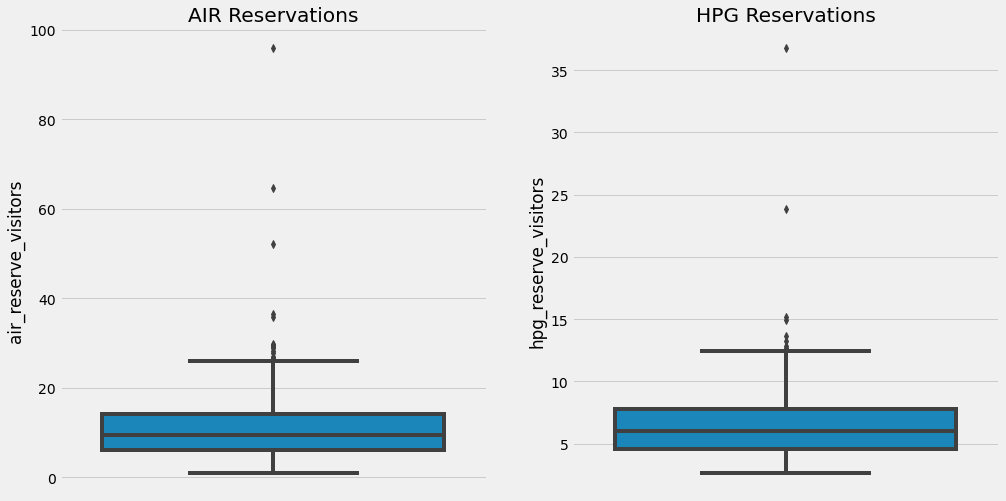

In [13]:
f,ax = plt.subplots(1,2, figsize=(15,8))
sns.boxplot(y='air_reserve_visitors', data=temp_1,ax=ax[0])
plt.title("title")
sns.boxplot(y='hpg_reserve_visitors', data=temp_2,ax=ax[1])
ax[0].set_title('AIR Reservations')
ax[1].set_title('HPG Reservations')
plt.show()

>**Observations:-**
>1. from the above boxplots, we can observe that average reservation count is not more than 10.
>2. In AIR, average reservation count is 10(approx) and in HPG average reservation count is 6(approx).
>3. 25th and 75th percentile reservation count in AIR is 7 and 15 respectively.
>4. 25th and 75th percentile reservation count in HPG is 4 and 8 respectively.
>5. In AIR,there are certain high values (outliers) we see in the range 40 to 100.
>6. In HPG,there are certain high values (outliers) we see in the range 13 to 40.

### 6.3 Genre wise restaurant market share

In [14]:
temp = air_store_info.groupby(['air_genre_name'],as_index=False)['air_store_id'].count()

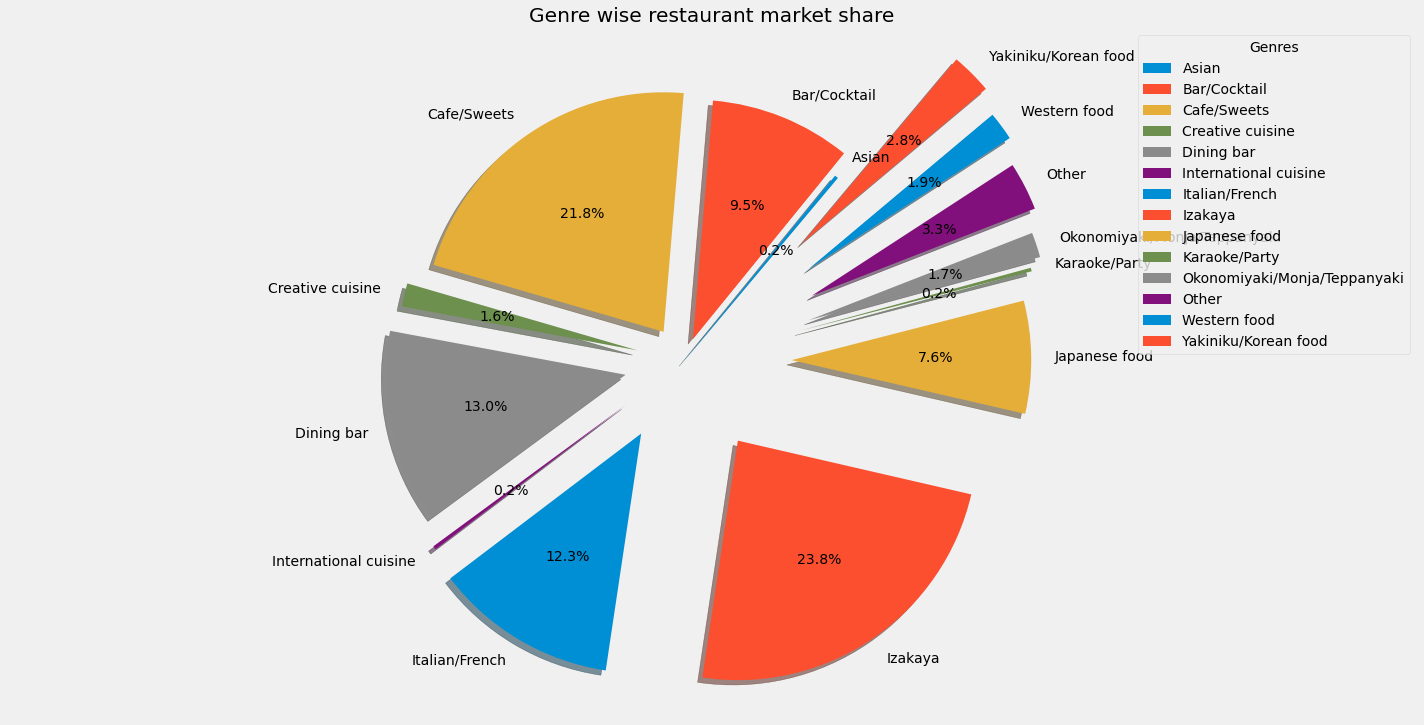

In [56]:
# Pie chart
labels = temp.air_genre_name.values
sizes = temp.air_store_id.values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7)  
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(title='Genres')
plt.title('Genre wise restaurant market share')
plt.show()

>**Observations:-**
>1. The restaurants in Japan is subdivided in 14 food genres.
>2. **Izakaya** is the most popular genre in Japan as almost **23.8%** of restaurants are of **Izakaya** genre.
>3. The second most popular genre in Japan is **Cafe/Sweets** having almost **21.8%** restaurant market share.
>4. **International cuisine**,**Asian** and **Karaoke/Party** are the least preferred genre having only **0.2%** each market share.
>5. Even western and korian food are not popular in japan at all. 
>6. To start a restaurant business in Japan, choosing foode genre will be the most important decision.

## 7.Bivariate Analysis

### 7.1 Number Unique Store

Text(0.5, 1.0, 'Number Unique Store ID')

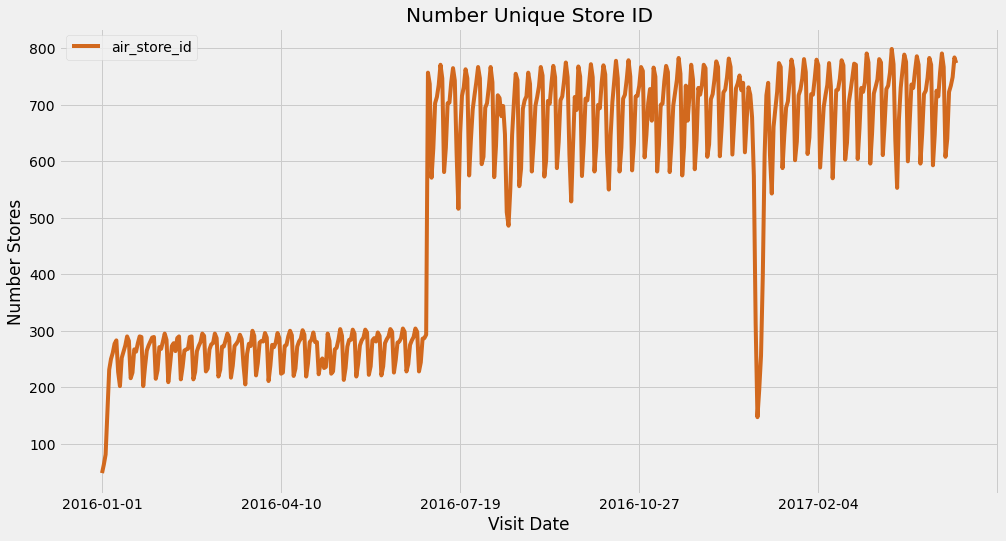

In [163]:
# refernce :- https://www.kaggle.com/faizalabdkadir/recruit-visual-eda-itadakimasu
f,ax = plt.subplots(1,1, figsize=(15,8))
stores= air_data.groupby(['visit_date'])['air_store_id'].size()
stores.plot(kind='line',  color= 'chocolate', grid=True, ax=ax, legend=True)
plt.ylabel("Number Stores")
plt.xlabel("Visit Date")
plt.title("Number Unique Store ID")

>**Observations:-**

>1. The above plot depits the fact that there is almost 150% hike in the number of restaurants during mid of 2016.
>2. The reason behind the hike is that there is an addition of 500(approx) new restaurants to the AIR database in mid 2016.
>3. The ups and downs that we see is may be due to the weekday and weekends.
>4. The sharp decrese on 1st of Jan is due to the new-year's eve, as most of the restaurants stay closed on new-years day.
>5. In total we have records of almost 800 japanese restaurants.

### 7.2 Visitor and Reservations

Text(0.5, 1.0, 'Visitor and Reservations')

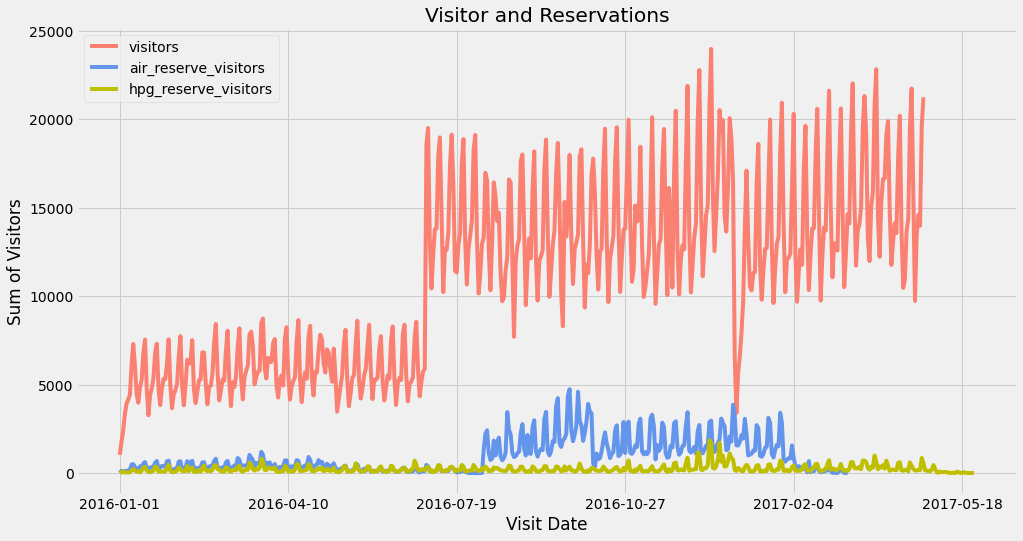

In [57]:
f,ax = plt.subplots(1,1,figsize=(15,8))
plt1 = air_data.groupby(['visit_date'])['visitors'].sum().to_frame()
plt2 = air_reserve_data.groupby(['visit_date'])['air_reserve_visitors'].sum().to_frame()
plt3 = hpg_reserve_data.groupby(['visit_date'])['hpg_reserve_visitors'].sum().to_frame()
plt1.plot(color='salmon', kind='line', ax=ax)
plt2.plot(color='cornflowerblue', kind='line', ax=ax)
plt3.plot(color='y', kind='line', ax=ax)
plt.legend()
plt.ylabel("Sum of Visitors")
plt.xlabel("Visit Date")
plt.title("Visitor and Reservations")

>**Observations:-**
>1. The abrupt hike in the middle of the 2016 is due to the addition of new restaurants (as explained in previous plot).
>2. It can be easily observed that the number of non-registered visitors is far more than the number of registered visitors.
>3. There is a sharp decline at new years eve as most of the restaurants remain close on new year eve.
>4. The number of registration in AIR is more than that of HPG.
>5. The maximum numbers of visitors is observed in the month od December, As we know there are a number of fetivals in December.

### 7.3 Visitors vs Genre

Text(0.5, 1.0, 'Total visitors by air_genre_name')

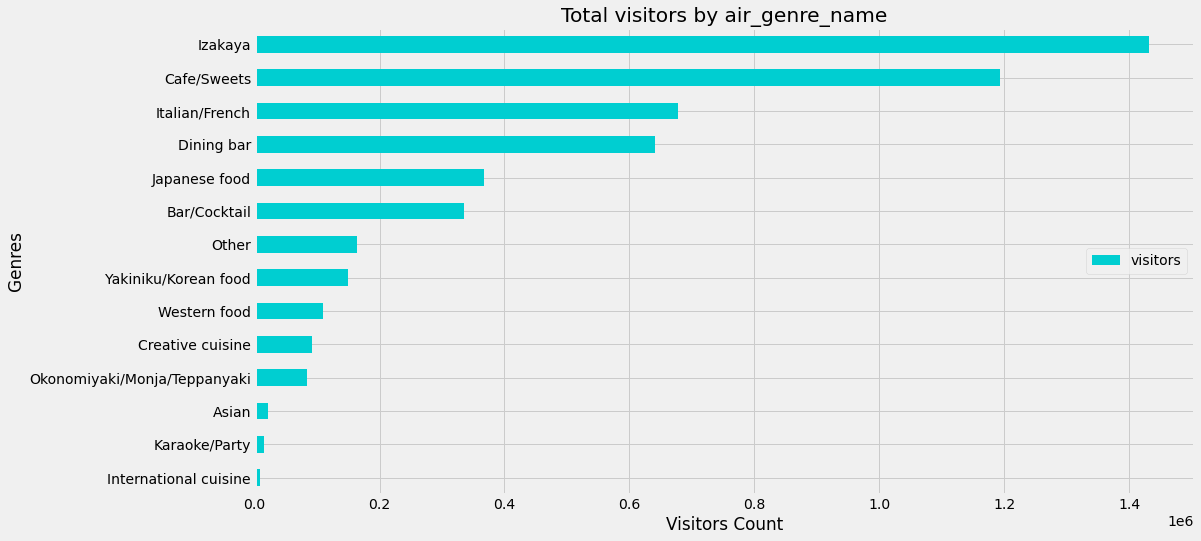

In [84]:
f,ax = plt.subplots(1,1, figsize=(15,8))
genre = air_data.groupby(['air_genre_name'])['visitors'].sum().to_frame()
genre.sort_values(by='visitors',inplace=True)
genre.plot(kind='barh',color= 'darkturquoise', grid=True, ax=ax, legend=True)
plt.ylabel('Genres')
plt.xlabel('Visitors Count')
plt.legend(loc='center right')
plt.title("Total visitors by air_genre_name", loc='center')

>**Observations:-**
>1. There are around 14 genres of food served by Japanese restaurants.
>2. The most popular and the most liked genre is **Izakaya** followed by **Cafe/Sweets** which are liked by maximum number of people.
>3. Asian, Karaoke/Party and International Cuisine are the emerging genre in Japan with least customers.
>4. Even the Western Food is not liked much in Japan.
>5. The food genre is the most important factor for growth in japanese restaurant business.

### 7.4 Reservations vs Genre

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


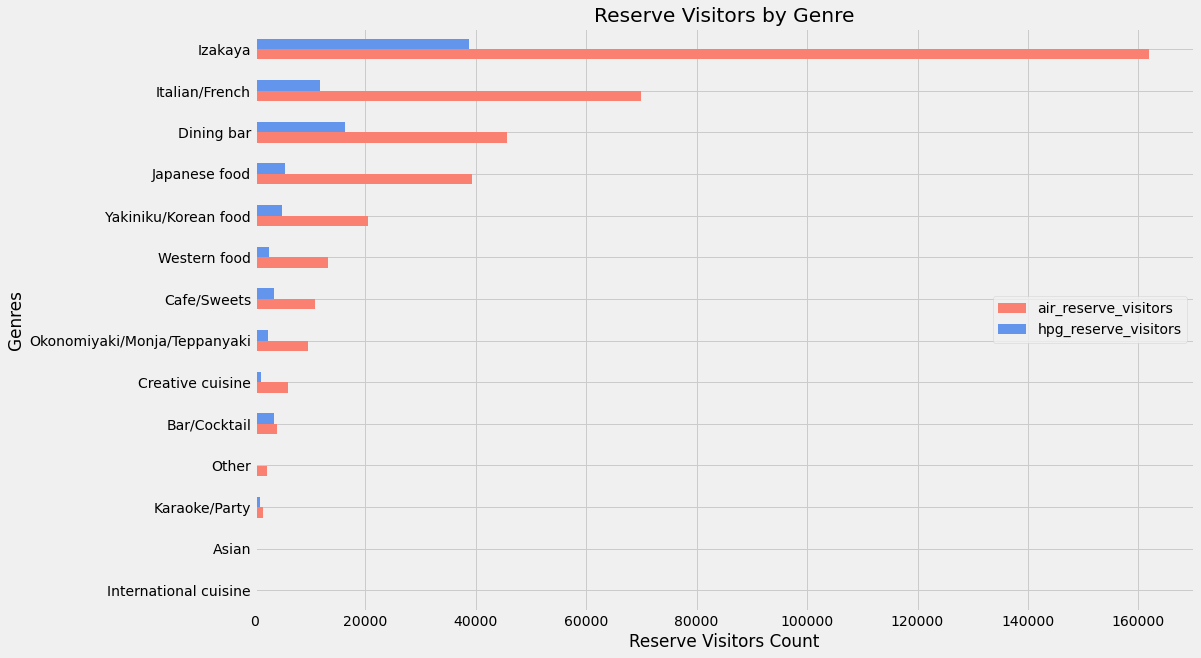

In [28]:
f,ax = plt.subplots(1,1, figsize=(15,10))
genre = air_data.groupby(['air_genre_name'])['air_reserve_visitors','hpg_reserve_visitors'].sum()
genre.sort_values(by=['air_reserve_visitors','hpg_reserve_visitors'],inplace=True)
genre.plot(kind='barh',color= ['salmon','cornflowerblue'], grid=True, ax=ax, legend=True)
plt.ylabel('Genres')
plt.xlabel('Reserve Visitors Count')
plt.legend(loc='center right')
plt.title("Reserve Visitors by Genre", loc='center')
plt.show()

>**Observation:-**
>1. Even for reservation trends, Izakaya is the most popular genre.
>2. In the unregistered visitors trends we observed that  **Cafe/Sweets** are the second most popular genre, but here **Italian/French** is the second most popular genre.
>3. **Aisan** and **International Cuisine** are the least popular as we have seen in previous plot.
>4. Surprisingly the **Japanese Food** is the 4th popular genre in Japan.

### 7.5 Visitors by Day of the Week

#### 7.5.1 Yearly trend of visitors by Day of week

Text(0.5, 1.0, 'Visitors by Day of the Week ')

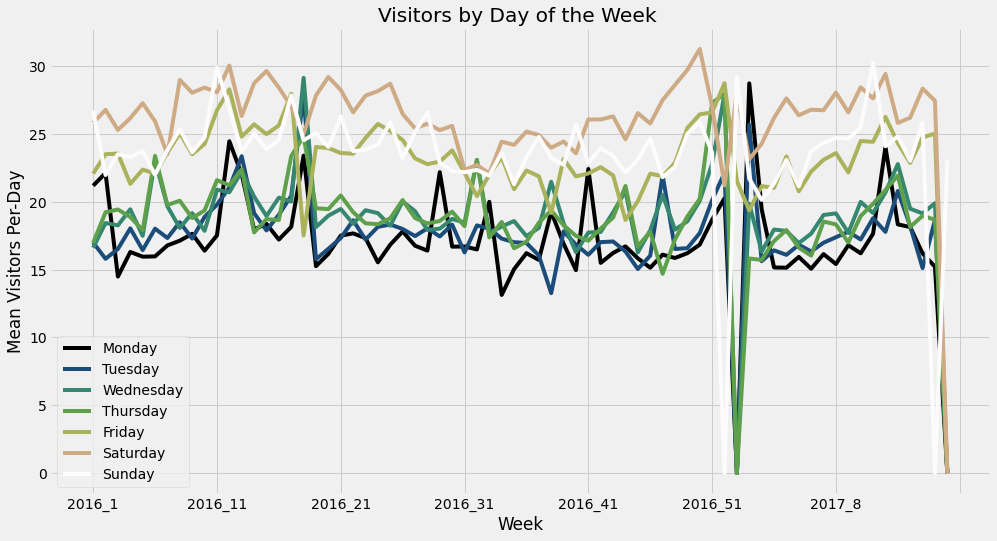

In [128]:
dow=pd.pivot_table(air_data, index=['year','week'], columns='dow',values='visitors',aggfunc=[np.mean],fill_value=0)
dow=pd.DataFrame(dow.to_records())
dow['year_week']=dow['year'].astype(str) +'_'+ dow['week'].astype(str)
dow.index = dow['year_week']
dow.drop(['year','week','year_week'],axis=1,inplace=True)
dow.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

f, ax=plt.subplots(1,1, figsize=(15,8))
dow.plot(kind='line', ax=ax,cmap='gist_earth')
plt.ylabel("Mean Visitors Per-Day")
plt.xlabel("Week")
plt.title("Visitors by Day of the Week ")

>**Observations:-**
>1. Saturday is the day on which most of the people prefere to go out to eat having highest number of visitors along whole year the reason being it is weekend.
>2. After saturday, Even on Sunday there is a peak of visitors.
>3. On Monday, least number of people go out to eat.
>4. Other week-days have almost similar visitors trend.
>5. The sharp decline after 51st week is due to the new year's eve as explained before.

#### 7.5.2 Average Visitors Each Day Of Week

Text(0.5, 1.0, 'Average Visitors Each Day Of Week')

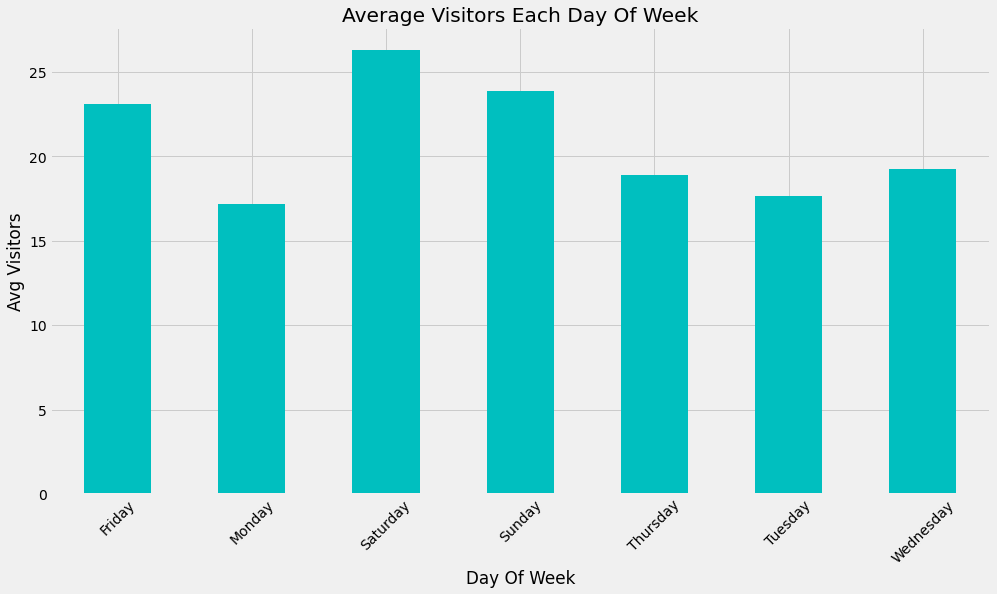

In [159]:
f, ax=plt.subplots(1,1, figsize=(15,8))
temp= air_data.groupby(['day_of_week'])['visitors'].mean().to_frame()
temp.plot(kind='bar',color= 'c', grid=True, ax=ax, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Day Of Week')
plt.ylabel('Avg Visitors')
plt.title('Average Visitors Each Day Of Week')

>**Observations:-**
>1. Even on daily basis, the restaurants observe higest number of visitors on saturday.
>2. Second highest number of visitors is on Sunday
>3. On Monday and Tuesday there is least number of visitors.
>4. Thursday and Wednesday has almost same visitors trends.

### 7.6 Average Visitors Each Day Of Month

Text(0.5, 1.0, 'Average Visitors Each Day Of Month')

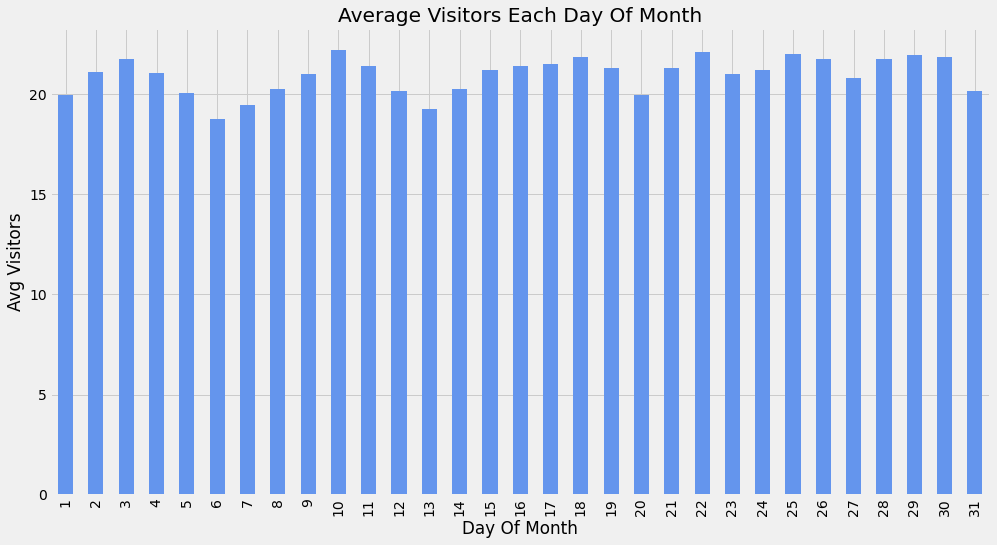

In [161]:
f, ax=plt.subplots(1,1, figsize=(15,8))
temp= air_data.groupby(['day'])['visitors'].mean().to_frame()
temp.plot(kind='bar',color= 'cornflowerblue', grid=True, ax=ax,legend=False)
plt.xlabel('Day Of Month')
plt.ylabel('Avg Visitors')
plt.title('Average Visitors Each Day Of Month')

>**Observations:-**
>1. The visitors spike that we see in between is due to the saturday effect as explained in previous plot.
>2. We can observe a constant hike at the end of the month, may be the credit of salaries at the end of the month be the reason behind that hike.
>3. A constant decline is observed on 6th,13th,20th and  31st day of month.
>4. A constant peak is observed on 3rd,10th and 22nd day of month.

### 7.7 Monthly Average Visitors

Text(0.5, 1.0, 'Monthly Average Visitors')

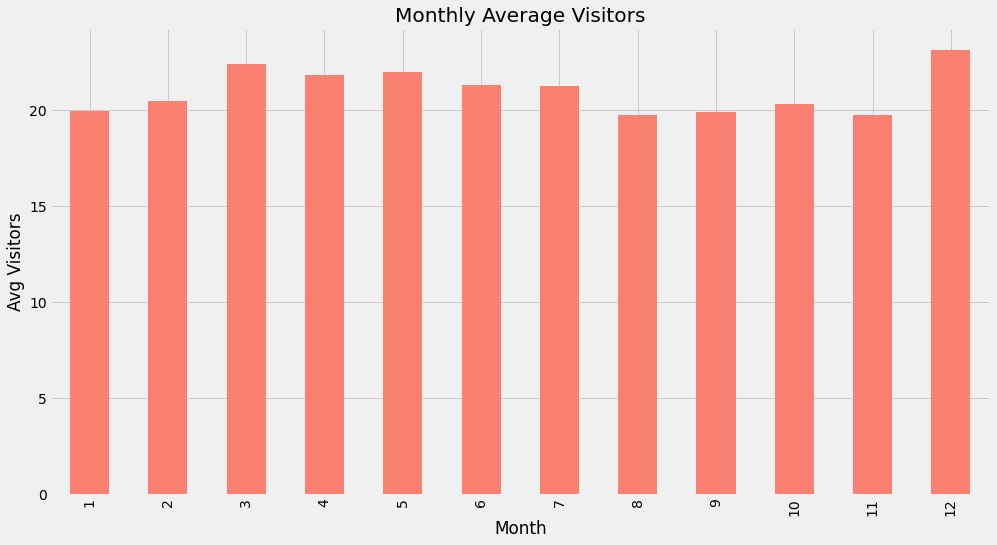

In [5]:
f, ax=plt.subplots(1,1, figsize=(15,8))
temp= air_data.groupby(['month'])['visitors'].mean().to_frame()
temp.plot(kind='bar',color= 'salmon', grid=True, ax=ax,legend=False)
plt.xlabel('Month')
plt.ylabel('Avg Visitors')
plt.title('Monthly Average Visitors')

>**Observations:-**
>1. We can observe visitors hike in the month of December.
>2. As the month of december is a festive month, May be this is reason behind the visitors hike.
>3. After month of december, march is the month having highest visitors.
>4. The month of august and november has least average visitors.

### 7.8 Average visitors on Holidays & Non-Holidays

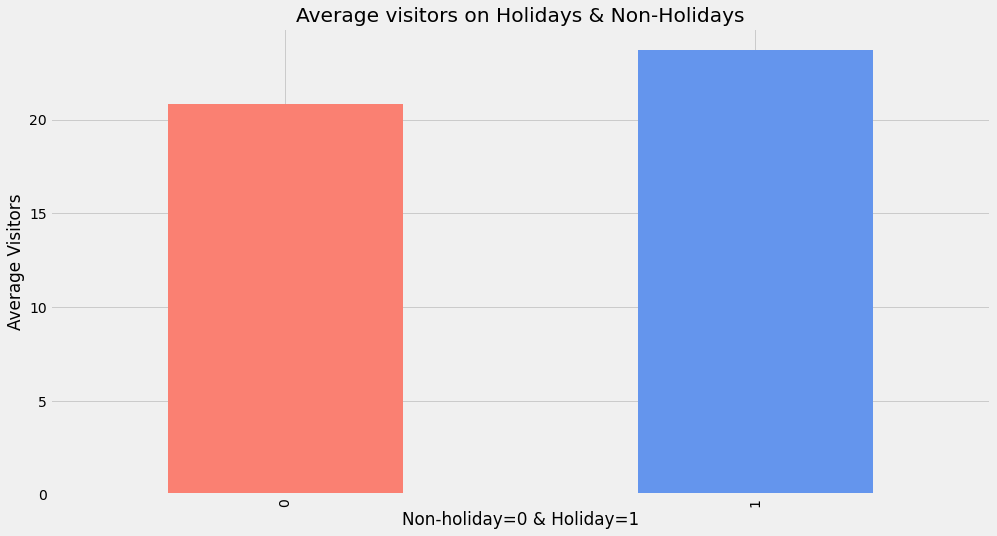

In [48]:
temp = air_data[['holiday_flg','visitors']].groupby(['holiday_flg'])['visitors'].mean()
temp.plot(kind='bar',color= ['salmon','cornflowerblue'],figsize=(15,8))
plt.ylabel('Average Visitors')
plt.xlabel('Non-holiday=0 & Holiday=1')
plt.title('Average visitors on Holidays & Non-Holidays')
plt.show()

>**Observation:-**
>1. It is observed from the plot and it is obvious to have more visitors on holidays than working days.
>2. Even then the difference between the visitors on holidays and working days is not significantly large, which is due to weekend effect.
>3. It is also observed from the above plot that on most of the holidays, restaurants are open.
>4. While processing data, we must take into account the holidays that come on weekends, such holidays should only be considered as weekends not as holidays just to take the weekends effect into account.

### 7.9 Hourly Visitors Behaviour

Text(0.5, 1.0, 'Hourly Registrations')

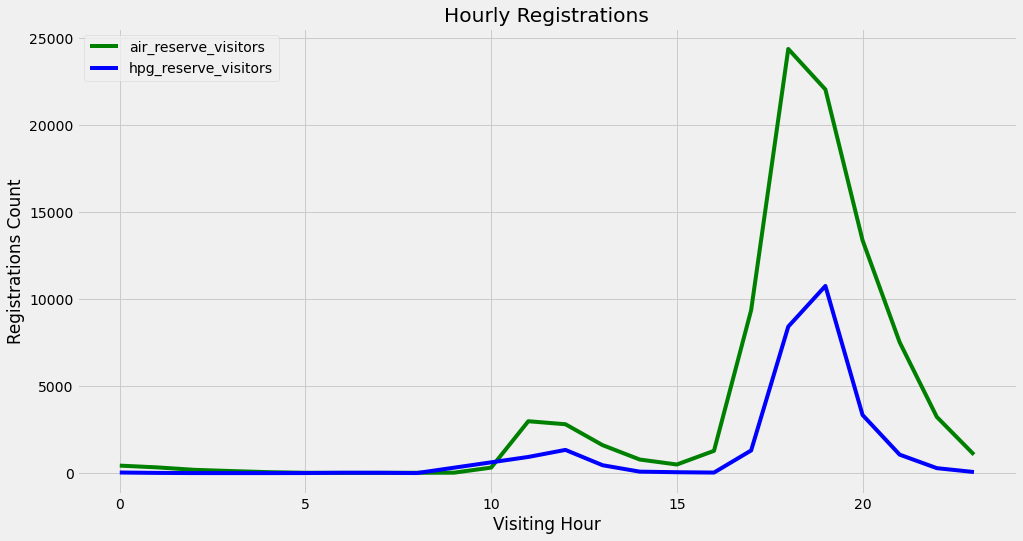

In [9]:
f, ax=plt.subplots(1,1, figsize=(15,8))
temp_1= air_reserve_data.groupby(['visit_hour'])['air_reserve_visitors'].count().to_frame()
temp_1.plot(kind='line',color= 'g', grid=True, ax=ax,legend=True)
temp_2= hpg_reserve_data.groupby(['visit_hour'])['hpg_reserve_visitors'].count().to_frame()
temp_2.plot(kind='line',color= 'b', grid=True, ax=ax,legend=True)
plt.xlabel('Visiting Hour')
plt.ylabel('Registrations Count')
plt.title('Hourly Registrations')

### Observations:-
1. It is already observed that the number of resgistrations in AIR is more than HPG.
2. There is a small hike after 10:00 AM, As that is the time when people go to office.
3. The evening time is quite busy.
4. The highest number of visitors is between 5:30 PM to 7:00 PM (approx).
5. After 7:00 PM there is sharpe decline in number of visitors.
6. There are no (almost zero) visitors between between 12:00 AM and 7:00 AM (approx), it may be because restaurants stay closed during night.  

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Feature Engineering 

In [178]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import xgboost as xgb
from yellowbrick.model_selection import RFECV
from sklearn.pipeline import Pipeline
plt.style.use('fivethirtyeight')
import os

In [179]:
# set up root directory
official = 'data/official/'
weather = 'data/weather/'
generated = 'data/generated/'

In [180]:
# reading all files
air_reserve = pd.read_csv(official + 'air_reserve.csv')
air_store_info = pd.read_csv(official + 'air_store_info.csv')
air_visit_data = pd.read_csv(official + 'air_visit_data.csv')
hpg_reserve = pd.read_csv(official + 'hpg_reserve.csv')
hpg_store_info = pd.read_csv(official + 'hpg_store_info.csv')
store_id_relation = pd.read_csv(official + 'store_id_relation.csv')
date_info = pd.read_csv(official + 'date_info.csv')
sample_submission = pd.read_csv(official + 'sample_submission.csv')

In [181]:
# setup train & test
test = sample_submission.copy()
test['air_store_id'] = test['id'].apply(lambda x: str(x)[:-11])
test['visit_date'] = test['id'].apply(lambda x: str(x)[-10:])
test = test.drop(['id', 'visitors'], axis = 1)
train = air_visit_data.copy()

## 1.Processing Reservation data

In [182]:
# combine air and hpg data
hpg_air_reserve = store_id_relation.join(hpg_reserve.set_index('hpg_store_id'), on = 'hpg_store_id')
hpg_air_reserve = hpg_air_reserve.drop('hpg_store_id', axis = 1)
reserve = pd.concat([air_reserve, hpg_air_reserve])

# convert columns of "reserve" table into datetime format
reserve['visit_datetime'] =  pd.to_datetime(reserve['visit_datetime'])
reserve['reserve_datetime'] =  pd.to_datetime(reserve['reserve_datetime'])

# create column for visit date inside "reserve" table
reserve['visit_date'] = reserve['visit_datetime'].apply(lambda x: str(x)[0:10])

# calculate the gap between visit time and reservation time inside "reserve" table
reserve['hour_gap'] = reserve['visit_datetime'].sub(reserve['reserve_datetime'])
reserve['hour_gap'] = reserve['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))

# separate reservation into 5 categories based on gap lenght
reserve['reserve_-12_h'] = np.where(reserve['hour_gap'] <= 12,
                                    reserve['reserve_visitors'], 0)
reserve['reserve_12_37_h'] = np.where((reserve['hour_gap'] <= 37) & (reserve['hour_gap'] > 12),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_37_59_h'] = np.where((reserve['hour_gap'] <= 59) & (reserve['hour_gap'] > 37),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_59_85_h'] = np.where((reserve['hour_gap'] <= 85) & (reserve['hour_gap'] > 59),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_85+_h'] = np.where((reserve['hour_gap'] > 85),
                                     reserve['reserve_visitors'], 0)

# group by air_store_id and visit_date
group_list = ['air_store_id', 'visit_date', 'reserve_visitors', 'reserve_-12_h',
              'reserve_12_37_h', 'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85+_h']
reserve = reserve[group_list].groupby(['air_store_id', 'visit_date'], as_index = False).sum()
for i in group_list[2:]:
    reserve[i] = reserve[i].apply(lambda x: np.log1p(x))

## 2.Genre and Area wise restaurants grouping

In [183]:
air_genres_area = air_store_info.copy()
air_genres_area = air_genres_area[['air_store_id', 'air_genre_name', 'air_area_name']].groupby(['air_genre_name', 'air_area_name'],
                                                                                              as_index = False).count()
air_genres_area = air_genres_area.rename(columns = {'air_store_id': 'genre_in_area'})

## 3.Area wise restaurants grouping 

In [184]:
# total amount of restaurants in area
air_area = air_store_info.copy()
air_area = air_area[['air_store_id', 'air_area_name']].groupby(['air_area_name'], as_index = False).count()
air_area = air_area.rename(columns = {'air_store_id': 'total_r_in_area'})

## 4.Processing weekend and holidays data

In [185]:
# additional features for weekends and holidays
date_info_mod = date_info.copy()
date_info_mod['holiday_eve'] = np.zeros(date_info_mod.shape[0])
date_info_mod['holiday_eve'].iloc[:-1] = date_info_mod['holiday_flg'].copy().values[1:]
date_info_mod['non_working'] = np.where(date_info_mod['day_of_week'].isin(['Saturday', 'Sunday']) |
                                        date_info_mod['holiday_flg'] == 1, 1, 0)
date_info_mod = date_info_mod.drop('holiday_flg', axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 5.Visitors statistics on the basis of working & non-working days

In [186]:
# average visitors per restaurant by working and non-working days
air_visit_wd = air_visit_data.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')
air_visit_wd['visitors'] = air_visit_wd['visitors'].apply(lambda x: np.log1p(x)) 

# average visitors per restaurant
mean_df = air_visit_wd[['visitors',
                        'air_store_id',
                        'non_working']].copy().groupby(['air_store_id',
                                                        'non_working'],
                                                        as_index = False).mean()
mean_df = mean_df.rename(columns = {'visitors': 'visitors_mean'})


# median visitors per restaurant
median_df = air_visit_wd[['visitors',
                          'air_store_id',
                          'non_working']].copy().groupby(['air_store_id',
                                                          'non_working'],
                                                          as_index = False).median()
median_df = median_df.rename(columns = {'visitors': 'visitors_median'})

# max visitors per restaurant
max_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).max()
max_df = max_df.rename(columns = {'visitors': 'visitors_max'})

# min visitors per restaurant
min_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).min()
min_df = min_df.rename(columns = {'visitors': 'visitors_min'})

## 6.Merging with train and test

In [187]:
# add month of visit
train['month'] = train['visit_date'].apply(lambda x: float(str(x)[5:7]))

# add weekday and holiday flag
train = train.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')
# add genre and area name)
train = train.join(air_store_info.set_index('air_store_id'), on = 'air_store_id')
# add quantity of same genre in area
train = pd.merge(train, air_genres_area, how = 'left',
                  left_on = ['air_genre_name', 'air_area_name'],
                  right_on = ['air_genre_name', 'air_area_name'])
# add total quatity of restaurants in area
train = pd.merge(train, air_area, how = 'left',
                  left_on = ['air_area_name'],
                  right_on = ['air_area_name'])
# add reservation information
train = pd.merge(train, reserve, how = 'left',
                  left_on = ['air_store_id', 'visit_date'],
                  right_on = ['air_store_id', 'visit_date'])
# add visitors number mean, median, max and min per each restaurant
train = pd.merge(train, mean_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
train = pd.merge(train, median_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
train = pd.merge(train, max_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
train = pd.merge(train, min_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
# change NaN to 0
train = train.fillna(0) 

In [188]:
# add month of visit
test['month'] = test['visit_date'].apply(lambda x: float(str(x)[5:7]))

# add weekday and holiday flag
test = test.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')
# add genre and area name)
test = test.join(air_store_info.set_index('air_store_id'), on = 'air_store_id')
# add quantity of same genre in area
test = pd.merge(test, air_genres_area, how = 'left',
                  left_on = ['air_genre_name', 'air_area_name'],
                  right_on = ['air_genre_name', 'air_area_name'])
# add total quatity of restaurants in area
test = pd.merge(test, air_area, how = 'left',
                  left_on = ['air_area_name'],
                  right_on = ['air_area_name'])
# add reservation information
test = pd.merge(test, reserve, how = 'left',
                  left_on = ['air_store_id', 'visit_date'],
                  right_on = ['air_store_id', 'visit_date'])
# add visitors number mean, median, max and min per each restaurant
test = pd.merge(test, mean_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
test = pd.merge(test, median_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
test = pd.merge(test, max_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
test = pd.merge(test, min_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
# change NaN to 0
test = test.fillna(0) 

In [189]:
train['id'] = train['air_store_id'] + str('_') + train['visit_date']
test['id'] = test['air_store_id'] + str('_') + test['visit_date']

# getting unimportant columns
drop_train_col = ['air_store_id', u'visit_date', u'visitors', u'month', u'day_of_week',u'air_genre_name', u'air_area_name',
       u'latitude', u'longitude']
drop_test_col = ['air_store_id', u'visit_date',  u'month', u'day_of_week',u'air_genre_name', u'air_area_name',
       u'latitude', u'longitude']

train = train.drop(drop_train_col,axis=1)
test = test.drop(drop_test_col,axis=1)

sample_submission['air_store_id'] = sample_submission['id'].apply(lambda x: x.split('_')[0]+str('_') +x.split('_')[1])
sample_submission['visit_date'] = sample_submission['id'].apply(lambda x: x.split('_')[2])
sample_submission['visit_date'] = pd.to_datetime(sample_submission['visit_date'],format= '%Y-%m-%d %H:%M:%S')

air_visit_data = air_visit_data.merge(air_store_info,how = 'left',on= 'air_store_id')
sample_submission = sample_submission.merge(air_store_info,how = 'left',on= 'air_store_id')

air_visit_data['id'] = air_visit_data['air_store_id'] + str('_') + air_visit_data['visit_date']
air_visit_data = air_visit_data.merge(train,on='id',how= 'left')
air_visit_data = air_visit_data.drop('id',axis=1)
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'],format= '%Y-%m-%d')
sample_submission =  sample_submission.merge(test,how = 'left',on='id')

## 7.More features using date

In [190]:
air_visit_data['visit_date_month'] =air_visit_data.visit_date.dt.month
air_visit_data['visit_date_dayofw'] =air_visit_data.visit_date.dt.dayofweek
air_visit_data['visit_date_year'] =air_visit_data.visit_date.dt.year
air_visit_data['visit_date_dayofm'] =air_visit_data.visit_date.dt.day
air_visit_data['weekofyear'] =air_visit_data.visit_date.dt.weekofyear
sample_submission['visit_date_month'] =sample_submission.visit_date.dt.month
sample_submission['visit_date_dayofw'] =sample_submission.visit_date.dt.dayofweek
sample_submission['visit_date_year'] =sample_submission.visit_date.dt.year
sample_submission['visit_date_dayofm'] =sample_submission.visit_date.dt.day
sample_submission['weekofyear'] =sample_submission.visit_date.dt.weekofyear
air_visit_data.loc[air_visit_data.weekofyear==53,'weekofyear'] =0 
sample_submission.loc[sample_submission.weekofyear==53,'weekofyear'] =0 

## 8.Number of open restaurants on weekly basis

In [191]:
total_air_ids = list(air_store_info.air_store_id.unique())
df_total = pd.concat((air_visit_data,sample_submission))
df_total = df_total[['weekofyear','visit_date_year','air_store_id']]
df_total = df_total.sort_values(['visit_date_year','weekofyear'])
weekofyear = list(df_total['weekofyear'].unique())
year = list(df_total['visit_date_year'].unique())

# calculating number of open restaurants on weekly basis
week_open_restro = []
for i in year:
    for j in weekofyear:
        l= len(list(df_total.loc[(df_total.visit_date_year ==i) & (df_total.weekofyear ==j),'air_store_id'].unique()))
        if (i==2017) & (j>22):
            break
        week_open_restro.append([i,j,l])

df_open_restro = pd.DataFrame(week_open_restro)
df_open_restro.columns = ['visit_date_year','weekofyear','no_open_restro']

## 9.Reservations count & sum on daily basis

In [192]:
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'],format= '%Y-%m-%d %H:%M:%S')
air_reserve['visit_date'] = air_reserve.visit_datetime.apply(lambda x: str(x).split(' ')[0])
air_reserve['visit_date'] = pd.to_datetime(air_reserve['visit_date'],format= '%Y-%m-%d %H:%M:%S')

hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'],format= '%Y-%m-%d %H:%M:%S')
hpg_reserve['visit_date'] = hpg_reserve.visit_datetime.apply(lambda x: str(x).split(' ')[0])
hpg_reserve['visit_date'] = pd.to_datetime(hpg_reserve['visit_date'],format= '%Y-%m-%d %H:%M:%S')

for i in ['reserve_datetime','reserve_visitors']:
        k = air_reserve[[i,'visit_date','air_store_id']].groupby(['visit_date','air_store_id'])[i].apply(lambda x: x.tolist()).reset_index()
        name = i + 'list'
        if i == 'reserve_datetime':
            k1  = k.copy()
        else:
            k1[name] = k[i].copy()


air_visit_data = air_visit_data.merge(k1,on=['air_store_id','visit_date'],how = 'left')
sample_submission = sample_submission.merge(k1,on=['air_store_id','visit_date'],how = 'left')

In [193]:
def cal_count(x):
    try: 
        if pd.isnull(x):
            return 0
        else:
            return len(x)
                    
    except:
        return len(x)
def cal_sum(x):
    try: 
        if pd.isnull(x):
            return -1
        else:
            return sum(x)                
    except:
        return sum(x)
               
air_visit_data['total_reserve']= air_visit_data['reserve_visitorslist'].apply(cal_sum)
air_visit_data['numb_total_reserve'] = air_visit_data['reserve_visitorslist'].apply(cal_count)

sample_submission['total_reserve']= sample_submission['reserve_visitorslist'].apply(cal_sum)
sample_submission['numb_total_reserve'] = sample_submission['reserve_visitorslist'].apply(cal_count)

## 10.Daily, Weekly, Monthly & Yearly visitors statistics

In [194]:
columns = [i for i in air_visit_data.columns if i in sample_submission.columns]
train = air_visit_data.copy()
test = sample_submission.copy()

In [195]:
train_2017 = train.loc[(train.visit_date_year>=2017)].copy()

# mean visitors by id year 2017
mean_v_id_2017 = train_2017[['visitors','air_store_id']].groupby('air_store_id').agg('mean').reset_index()
mean_v_id_2017.columns = ['air_store_id','mean_v_id_2017']

# median visitors by id 2017
median_vid_2017 = train_2017[['visitors','air_store_id']].groupby('air_store_id').agg('median').reset_index()
median_vid_2017.columns = ['air_store_id','median_vid_2017']

In [196]:
# mean visitors by month
mean_v_month = train[['visitors','visit_date_month']].groupby(['visit_date_month']).agg('mean').reset_index()
mean_v_month.columns = ['visit_date_month','mean_v_month']

# mean visitors by id & day_of_week 2017
mean_v_id_dow_2017 = train_2017[['visitors','air_store_id','visit_date_dayofw']].groupby(['air_store_id','visit_date_dayofw']).agg('mean').reset_index()
mean_v_id_dow_2017.columns = ['air_store_id','visit_date_dayofw','mean_v_id_dow_2017']

# mean visitors by day_of_week 2017
mean_v_dow_2017 = train_2017[['visitors','visit_date_dayofw']].groupby(['visit_date_dayofw']).agg('mean').reset_index()
mean_v_dow_2017.columns = ['visit_date_dayofw','mean_v_dow_2017']

# median visitors by month
median_v_month = train[['visitors','visit_date_month']].groupby(['visit_date_month']).agg('median').reset_index()
median_v_month.columns = ['visit_date_month','median_v_month']

# median visitors by id and day_of_week 2017
median_v_is_dow_2017 = train_2017[['visitors','air_store_id','visit_date_dayofw']].groupby(['air_store_id','visit_date_dayofw']).agg('median').reset_index()
median_v_is_dow_2017.columns = ['air_store_id','visit_date_dayofw','median_v_is_dow_2017']

# median visitors by day_of_week 2017
median_v_dow_2017 = train_2017[['visitors','visit_date_dayofw']].groupby(['visit_date_dayofw']).agg('median').reset_index()
median_v_dow_2017.columns = ['visit_date_dayofw','median_v_dow_2017']



# mean visitors by id
mean_v_id = train[['visitors','air_store_id']].groupby('air_store_id').agg('mean').reset_index()
mean_v_id.columns = ['air_store_id','mean_v_id']

# mean visitors by id & day_of_week
mean_v_id_dow = train[['visitors','air_store_id','visit_date_dayofw']].groupby(['air_store_id','visit_date_dayofw']).agg('mean').reset_index()
mean_v_id_dow.columns = ['air_store_id','visit_date_dayofw','mean_v_id_dow']

# mean visitors by day_of_week
mean_v_dow = train[['visitors','visit_date_dayofw']].groupby(['visit_date_dayofw']).agg('mean').reset_index()
mean_v_dow.columns = ['visit_date_dayofw','mean_v_dow']


In [197]:
train = air_visit_data.copy()
test = sample_submission.copy()
train = train[columns]
test = test[columns]

# merging train and test
train = train.merge(mean_v_id_2017,on='air_store_id',how='left')
test = test.merge(mean_v_id_2017,on='air_store_id',how='left')
train = train.merge(median_vid_2017,on='air_store_id',how='left')
test = test.merge(median_vid_2017,on='air_store_id',how='left')
train = train.merge(mean_v_month,on=['visit_date_month'],how='left')
test = test.merge(mean_v_month,on= ['visit_date_month'],how='left')
train = train.merge(mean_v_dow_2017,on=['visit_date_dayofw'],how='left')
test = test.merge(mean_v_dow_2017,on= ['visit_date_dayofw'],how='left')
train = train.merge(median_v_month,on=['visit_date_month'],how='left')
test = test.merge(median_v_month,on= ['visit_date_month'],how='left')
train = train.merge(median_v_dow_2017,on=['visit_date_dayofw'],how='left')
test = test.merge(median_v_dow_2017,on= ['visit_date_dayofw'],how='left')
train = train.merge(mean_v_id,on=['air_store_id'],how='left')
test = test.merge(mean_v_id,on= ['air_store_id'],how='left')
train = train.merge(mean_v_id_dow,on=['air_store_id','visit_date_dayofw'],how='left')
test = test.merge(mean_v_id_dow,on= ['air_store_id','visit_date_dayofw'],how='left')
train = train.merge(mean_v_dow,on=['visit_date_dayofw'],how='left')
test = test.merge(mean_v_dow,on= ['visit_date_dayofw'],how='left')
train = train.merge(df_open_restro,on=['visit_date_year','weekofyear'],how='left')
test = test.merge(df_open_restro,on= ['visit_date_year','weekofyear'],how='left')

# getting id's from test set
ids = sample_submission['id'].values

## 11.Processing weekend and holidays data

In [198]:
date_info['calendar_date']  = pd.to_datetime(date_info['calendar_date'],format= '%Y-%m-%d')
date_info.rename(columns = {'calendar_date':'visit_date'},inplace = True)
# get weekend and holidays
wkend_holidays = date_info.apply((lambda x:(x.day_of_week=='Sunday' or x.day_of_week=='Saturday') and x.holiday_flg==1), axis=1)
date_info.loc[wkend_holidays, 'holiday_flg'] = 0
date_info['weight'] = ((date_info.index + 1.0) / len(date_info)) ** 5.0
# merge tran & test
train = train.merge(date_info,on='visit_date',how='left')
test = test.merge(date_info,on='visit_date',how='left')

In [199]:
relation = pd.read_csv('data/official/store_id_relation.csv')
relation['both'] = 1
# merge with tra & test
train = train.merge(relation,how='left',on='air_store_id')
test = test.merge(relation,how='left',on='air_store_id')
train = train.merge(hpg_store_info,how='left',on='hpg_store_id')
test = test.merge(hpg_store_info,how='left',on='hpg_store_id')

## 12.Processing Weather Data

In [200]:
# processing weather data for each restaurant
if os.path.exists(generated + '/air_weather_data.csv'):
    air_weather_data = pd.read_csv(generated + '/air_weather_data.csv')
    air_weather_data['visit_date'] = pd.to_datetime(air_weather_data['visit_date'])

else:
    
    air_weather = pd.read_csv(weather + 'air_store_info_with_nearest_active_station.csv')

    air_station_relation = air_weather.set_index('air_store_id')['station_id'].to_dict()

    date = []
    low_temp =[]
    avg_temp = []
    high_temp = []
    pcpt = []
    air_id = []
    for i in air_store_info.air_store_id.values:
        f = pd.read_csv(weather + '1-1-16_5-31-17_Weather/'+air_station_relation[i] + '.csv')
        for enum,j in enumerate(f.calendar_date.values):
            date.append(j)
            low_temp.append(f.low_temperature.values[enum])
            avg_temp.append(f.avg_temperature.values[enum])
            high_temp.append(f.high_temperature.values[enum])
            pcpt.append(f.precipitation[enum])
            air_id.append(i)

    air_weather_data = pd.DataFrame({'air_store_id':air_id,
                                     'precipitation':pcpt,
                                     'visit_date':date,
                                     'low_temperature':low_temp,
                                     'avg_temperature':avg_temp,
                                     'high_temperature':high_temp})
    air_weather_data.to_csv(generated + '/air_weather_data.csv',index=False)

In [201]:
train = train.merge(air_weather_data,on=['air_store_id','visit_date'],how='left')
test = test.merge(air_weather_data,on= ['air_store_id','visit_date'],how='left')

## 13. Monthly visitors mean

In [202]:
# calculating monthly visitors mean for each restaurants
month_wise_mean=train.groupby(['air_store_id','visit_date_month'],as_index=False)['visitors'].mean()
month_wise_mean = month_wise_mean.pivot(index='air_store_id', columns='visit_date_month', values='visitors').reset_index()
month_wise_mean.columns = ['air_store_id','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']

# merging with train & test data 
train = train.merge(month_wise_mean,on='air_store_id',how='left')
test = test.merge(month_wise_mean,on='air_store_id',how='left')

## 14.Weekday-wise visitors mean

In [203]:
# calculating weekly visitors mean for each restaurants
weekday_wise_mean=train.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors'].mean()
weekday_wise_mean = weekday_wise_mean.pivot(index='air_store_id', columns='visit_date_dayofw', values='visitors').reset_index()
weekday_wise_mean.columns = ['air_store_id','w0','w1','w2','w3','w4','w5','w6']

# merging with train & test data 
train = train.merge(weekday_wise_mean,on='air_store_id',how='left')
test = test.merge(weekday_wise_mean,on='air_store_id',how='left')

## 15.Calculating Tfidf vectorizer and SVD of area & genre

In [204]:
air_tf = list(air_store_info.apply(lambda x:'%s %s' % (x['air_area_name'],x['air_genre_name']),axis=1))
# getting tfidf vector
tfv_200 = TfidfVectorizer(min_df=3,  max_features=200, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv_200.fit(air_tf)
tfv.fit(air_tf)

train_tf = list(train.apply(lambda x:'%s %s' % (x['air_area_name'],x['air_genre_name']),axis=1))
test_tf = list(test.apply(lambda x:'%s %s' % (x['air_area_name'],x['air_genre_name']),axis=1))

train_tf_vec =  tfv.transform(train_tf) 
test_tf_vec = tfv.transform(test_tf)

train_tf_vec_200 =  tfv_200.transform(train_tf) 
test_tf_vec_200 = tfv_200.transform(test_tf)

# applying Truncated SVD
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(train_tf_vec)
train_svd_vec = svd.transform(train_tf_vec)
test_svd_vec = svd.transform(test_tf_vec)

In [205]:
train_tf_vec.shape,test_tf_vec.shape

((252108, 1213), (32019, 1213))

In [206]:
# convert to dataframe
train_svd_vec = pd.DataFrame(train_svd_vec)
test_svd_vec = pd.DataFrame(test_svd_vec)

### Optimal SVD truncation using 'Gavish-Donoho' method

In [207]:
def del_zero_col(data):
    """Function to remove columns containing only zeros."""
    idx = np.argwhere(np.all(data[..., :] == 0, axis=0))
    data = np.delete(data, idx, axis=1)
    return data

def omega_approx(beta):
    """Return an approximate omega value for given beta. Equation (5) from Gavish 2014."""
    return (0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43)

def plot(sv,title):
    """Function to plot log(singular_vaues) vs number of components"""
    sv = np.sort(sv)[::-1]
    plt.plot(np.arange(1,len(sv)+1,1), np.log(sv))
    plt.scatter(np.arange(1,len(sv)+1,1), np.log(sv))
    plt.xlabel('No of components')
    plt.ylabel('log(singular_values)')
    plt.title(title)
    plt.show()


# https://arxiv.org/pdf/1305.5870.pdf (page no :- 3)
def Gavish_Donoho_Truncate(data):
    """ Function to find optimal SVD truncation using 'Gavish-Donoho' method"""
    # do SVD and find threshold
    U,sigma,Vt = svds(data, k = min(data.shape) - 1)
    beta = min(data.shape) / max(data.shape)
    threshold = np.median(sigma[np.nonzero(sigma)]) * omega_approx(beta)
    # reconstruct data (de-noised)
    sigma_dash = sigma.copy()
    sigma_dash[sigma < threshold] = 0
    X_dash = np.dot(U, np.diag(sigma_dash))
    return del_zero_col(X_dash),sigma[np.nonzero(sigma)],sigma_dash[np.nonzero(sigma_dash)]

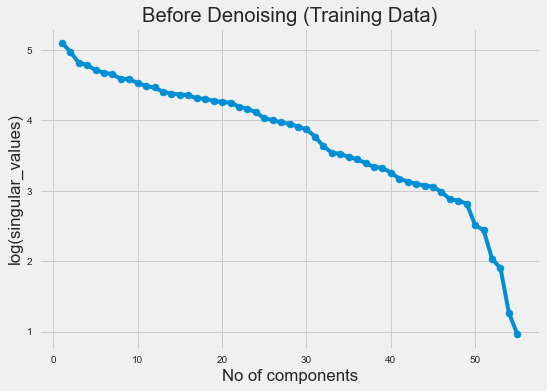

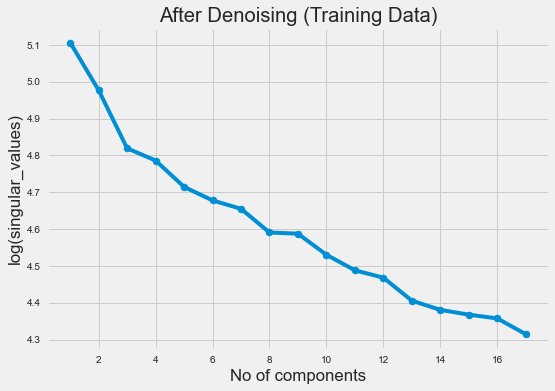

In [208]:
# finding optimal SVD truncation using 'Gavish-Donoho' method for training data
train_svd_opt_vec,sv_before_denoising,sv_after_denoising = Gavish_Donoho_Truncate(train_tf_vec_200)
plot(sv_before_denoising,'Before Denoising (Training Data)')
plot(sv_after_denoising,'After Denoising (Training Data)')

In [209]:
train_svd_opt_vec.shape

(252108, 17)

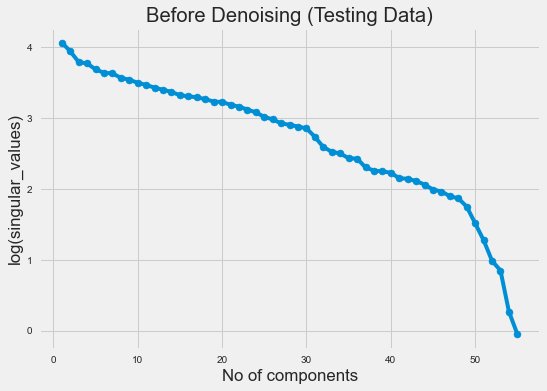

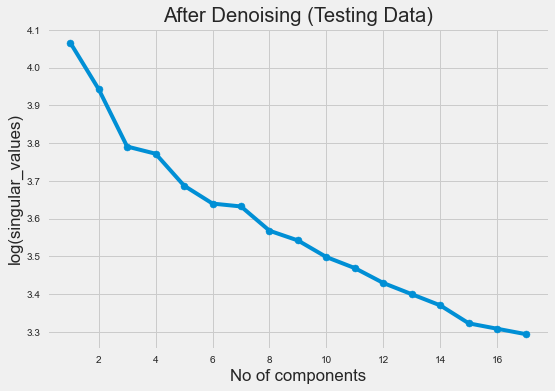

In [210]:
# finding optimal SVD truncation using 'Gavish-Donoho' method for testing data
test_svd_opt_vec,sv_before_denoising,sv_after_denoising = Gavish_Donoho_Truncate(test_tf_vec_200)
plot(sv_before_denoising,'Before Denoising (Testing Data)')
plot(sv_after_denoising,'After Denoising (Testing Data)')

In [211]:
test_svd_opt_vec.shape

(32019, 17)

In [212]:
# convert to DataFrame
train_svd_opt_vec = pd.DataFrame(train_svd_opt_vec)
test_svd_opt_vec = pd.DataFrame(test_svd_opt_vec)

## 12.Seperating training & validation data

In [213]:
# getting train & validation indexes
train_index = train.loc[train.visit_date <= pd.to_datetime('2017-03-30',format= '%Y-%m-%d')].index
val_index = train.loc[train.visit_date > pd.to_datetime('2017-03-30',format= '%Y-%m-%d')].index
y = train.visitors.values

## 13.Label encoding categorical features

In [214]:
# dropping unimportant columns
train = train.drop(['hpg_area_name','hpg_genre_name','reserve_visitorslist','reserve_datetime','visitors','visit_date'],axis =1)
test = test.drop(['hpg_area_name','hpg_genre_name','reserve_visitorslist','reserve_datetime','visitors','visit_date'],axis =1)
from sklearn import ensemble, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
train.replace(np.nan,-1,inplace=True)
test.replace(np.nan,-1,inplace=True)
text_columns = []
# label encoding categorical features
for f in train.columns:
    if (train[f].dtype == 'object'):  
        text_columns.append(f)            
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))

In [215]:
# merging with train and test data with optimal svd features
train_svd_opt = pd.concat([train,train_svd_opt_vec],axis=1)
test_svd_opt = pd.concat([test,test_svd_opt_vec],axis=1)

train_svd_opt.replace(np.nan,-1,inplace=True)
test_svd_opt.replace(np.nan,-1,inplace=True)

In [217]:
# save optimized features
train_svd_opt.to_csv(generated + 'train_svd_opt.csv',index=False)
test_svd_opt.to_csv(generated + 'test_svd_opt.csv',index=False)

In [218]:
train_svd_opt.shape,test_svd_opt.shape

((252108, 83), (32019, 83))

In [219]:
# merging with train and test data with simple svd features
train = pd.concat((train,train_svd_vec),axis=1)
test = pd.concat((test,test_svd_vec),axis=1)
train.replace(np.nan,-1,inplace=True)
test.replace(np.nan,-1,inplace=True)

In [220]:
train.shape,test.shape

((252108, 116), (32019, 116))

In [221]:
# save optimized features
train.to_csv(generated + 'train.csv',index=False)
test.to_csv(generated + 'test.csv',index=False)

In [222]:
# save visitors
np.save(generated + 'train_labels.npy',y)

In [83]:
train.shape,test.shape,y.shape

((252108, 116), (32019, 116), (252108,))

In [87]:
# validation data
val_train = train.iloc[train_index]
val_train_y = y[train_index]
val_test = train.iloc[val_index]
val_test_y = y[val_index]

val_train.to_csv(generated + 'val_train.csv',index=False)
val_test.to_csv(generated + 'val_test.csv',index=False)
np.save(generated + 'val_train_y.npy',val_train_y)
np.save(generated + 'val_test_y.npy',val_test_y)

## 14. Calculating Feature Importance

In [88]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(train, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

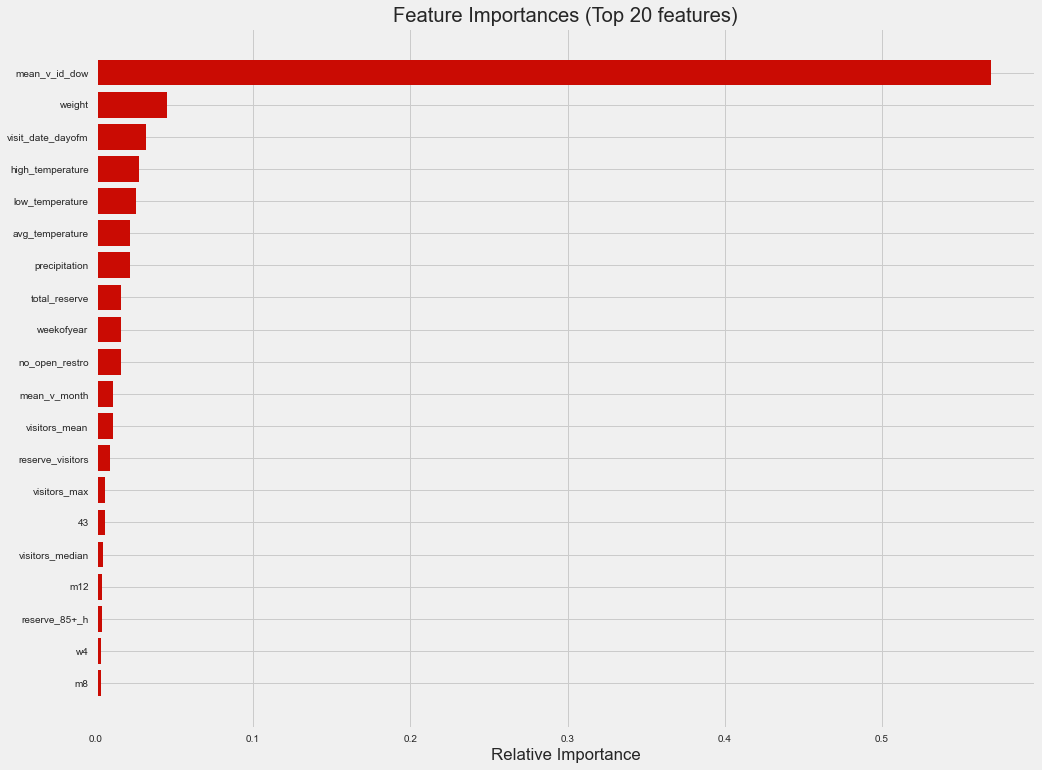

In [90]:
features = train.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(15,12))
plt.title('Feature Importances (Top 20 features)')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 15. Feature Selection using Recursive Feature Elimination

* **Finding out optimal number of features to be selected using Recursive Feature Elimination Cross-Validation**

In [95]:
# READING PROCESSED DATA
X_train = pd.read_csv(generated + 'val_train.csv')
X_val= pd.read_csv(generated + 'val_test.csv')
y_train=np.load(generated + 'val_train_y.npy')
y_val=np.load(generated + 'val_test_y.npy')

X_test = pd.read_csv(generated + 'test.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


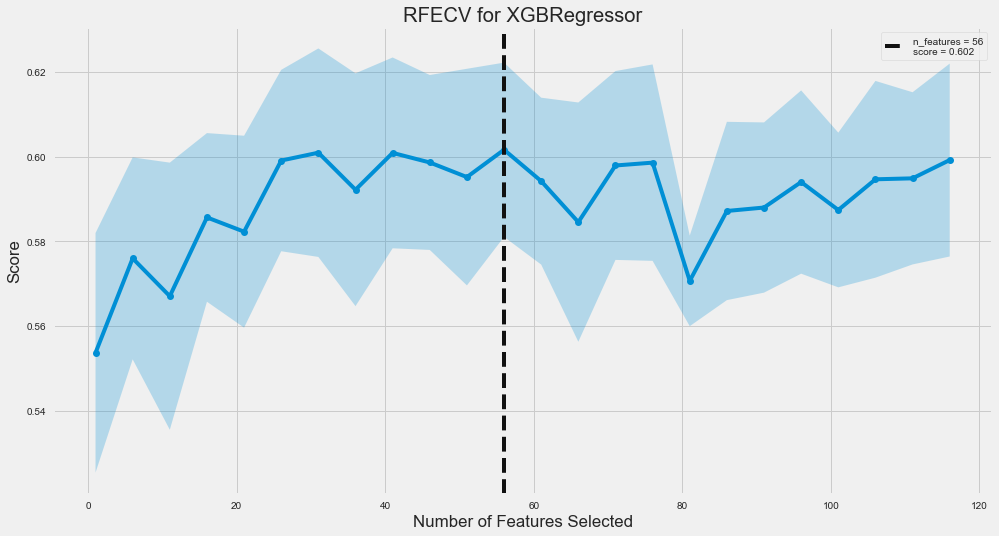

In [93]:
# setting up XGBRegressor to instantiate RFECV
model = xgb.XGBRegressor(objective='reg:squarederror',
                        eval_metric='rmse',
                        tree_method='gpu_hist')
f, ax=plt.subplots(1,1, figsize=(15,8))

# Instantiate RFECV visualizer with a XGBRegressor with step=5
visualizer = RFECV(model,step=5,ax=ax)
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

>**From above plot we can observe number of optimal features = 56 with score=0.602**

* **Selecting optimal features using Recursive Feature Eliminator**

In [96]:
# setting up Recursive Feature Eliminator with n_features_to_select=61
rfe = RFE(estimator=model, n_features_to_select=61)
rfe.fit(X_train,y_train)
print("Selected Columns and their respective ranks:-\n\n")
for i,j in enumerate(X_train.columns):
    if rfe.support_[i]:
        print('Column Name: {}, Rank: {}'.format(j, rfe.ranking_[i]))
    else:
        X_train.drop(columns=j,inplace=True)
        X_test.drop(columns=j,inplace=True)
        X_val.drop(columns=j,inplace=True)

Selected Columns and their respective ranks:-


Column Name: air_store_id, Rank: 1
Column Name: air_genre_name, Rank: 1
Column Name: holiday_eve, Rank: 1
Column Name: reserve_visitors, Rank: 1
Column Name: reserve_85+_h, Rank: 1
Column Name: visitors_mean, Rank: 1
Column Name: visitors_median, Rank: 1
Column Name: visitors_max, Rank: 1
Column Name: visit_date_month, Rank: 1
Column Name: visit_date_dayofw, Rank: 1
Column Name: visit_date_dayofm, Rank: 1
Column Name: weekofyear, Rank: 1
Column Name: total_reserve, Rank: 1
Column Name: mean_v_id_2017, Rank: 1
Column Name: median_vid_2017, Rank: 1
Column Name: mean_v_month, Rank: 1
Column Name: mean_v_dow_2017, Rank: 1
Column Name: mean_v_id, Rank: 1
Column Name: mean_v_id_dow, Rank: 1
Column Name: no_open_restro, Rank: 1
Column Name: holiday_flg, Rank: 1
Column Name: weight, Rank: 1
Column Name: hpg_store_id, Rank: 1
Column Name: precipitation, Rank: 1
Column Name: low_temperature, Rank: 1
Column Name: avg_temperature, Rank: 1
Column Name

In [41]:
X_train.shape,y_train.shape

((235552, 61), (235552,))

In [42]:
X_val.shape,y_val.shape

((16556, 61), (16556,))

In [43]:
X_test.shape

(32019, 61)

In [49]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True,  True,  True, False])

In [97]:
# SAVING PROCESSED DATA AFTER RFE
X_train.to_csv(generated + 'X_train_after_RFE.csv',index=False)
X_val.to_csv(generated + 'X_val_after_RFE.csv',index=False)
X_test.to_csv(generated + 'X_test_after_RFE.csv',index=False)

### Summary & Conclusion:-

**From EDA:-**
>1. Training Dataset Overview:-
>>1. Total number of unique AIR restaurants:- 829
>>2. Total restaurants common in AIR and HPG:- 150
>>3. Total unique genre in AIR restaurants:- 14
>>4. Total number of AIR restaurant's locations:- 103
>>5. Average daily visitors:- 20.973761245180636
>>6. Training data duration:-2016-01-01 to 2017-04-22
>2. Test Dataset Overview:-
>>1. Total unique restaurants:- 821
>>2. Test data duration:- 2017-04-23 to 2017-05-31
>3. There are a large number of restaurants which have capacity less than 20.
>4. Almost 90% of the restaurants have less than 40 visitors/day.
>5. The spread of AIR reservations is higher than that of HPG reservations.
>6. Even in AIR, the maximum number of visitors registered is 40, but the number of registrations are more than that of HPG.
>7. The number of unregistered visitors is far more than the number of registered visitors.
>8. Izakaya is the most popular genre in Japan as almost 23.8% of restaurants are of Izakaya genre.
>9. The second most popular genre in Japan is Cafe/Sweets having almost 21.8% restaurant market share.
>10. International cuisine,Asian and Karaoke/Party are the least preferred genre having only 0.2% each market share.
>11. There is almost 150% hike in the number of restaurants during mid of 2016.
>12. The reason behind the hike is that there is an addition of 500(approx) new restaurants to the AIR database in mid 2016.
>13. There is a sharp decline at new years eve as most of the restaurants remain close on new year eve.
>14. The maximum numbers of visitors is observed in the month of December, As we know there are a number of fetivals in December.
>15. Saturday is the day on which most of the people prefere to go out to eat having highest number of visitors along whole year the reason being it is weekend.
>16. We can observe a constant hike at the end of the month, may be the credit of salaries at the end of the month be the reason behind that hike.
>17. It is obvious to have more visitors on holidays than working days.
>18. The evening time is quite busy.
>19. The highest number of visitors is between 5:30 PM to 7:00 PM (approx).  

**From Feature Engineering:-**
>1. Overall we have engineered 122 features.
>2. Monthly visitors mean is calculated for each restaurants. 
>3. Weekly visitors mean is calculate for each restaurant and for each day of week.
>4. Weather data is calculated from the weather data file given for each area according to weather stations.
>5. We calculated various features from the reservation data including the hourly gap feature using the gap between the registration and visit.
>6. Number of restaurants in a given area has a lot of effect on the number of visitors that's why we have taken it into account.
>7. Similary genre wise number of restaurants in a given localitry is also most imprtant that's why we grouped number of restaurants according to the genre w.r.t each area.
>8. Along with the holiday data, we have also taken into consideration the day before holiday and day afer holiday, 
we have also calculated non-working days using holiday data and weekends data.
>9. Visitors statistics on the basis of working and non working day is also calculated.
>10. We have also calculated the number of open restaurants on weekly basis.
>11. We also calculated daily,weekly,monthly visitors statistics. 
>12. Lastly we calculated tfidf vectors using textual data from area and genre and then we calculated SVD using the vectors obtained from tfidf.
>13. For the purpose of calculatig feature importance we used DecisionTreeRegressor.
>14. The most important feature is mean of visitors for a given restaurant on a given day of week.
>15. With Gavish-Donoho method for optimal SVD truncation we futher reduced the dimension while keeping important SVD features.
>16. By using Recursive Feature Elimination we we got 61 essential features while reducing the dimentionality.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Modeling 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.offline as offline
import pickle

In [2]:
# set up root directory
official = 'data/official/'
weather = 'data/weather/'
generated = 'data/generated/'

In [3]:
# cross validation data
X_train = pd.read_csv(generated + 'val_train.csv')
X_val = pd.read_csv(generated + 'val_test.csv')
y_train=np.load(generated + 'val_train_y.npy')
y_val = np.load(generated + 'val_test_y.npy')
# whole data
train = pd.read_csv(generated + 'train.csv')
test = pd.read_csv(generated + 'test.csv')
y = np.load(generated + 'train_labels.npy')

y=y+1 # to get rid of log(0) error

## 1.Scoring Function

In [4]:
# Root Mean Squared logarithemic Error
def rmsle_score(y,y_pred): 
    """
    Compute the Root Mean Squared Log Error for prediction y_pred and targets y

    Args:
        y_pred - numpy array containing log of predictions 
        y - numpy array containing log of targets 
    """
    # to get anti- logs
    y = np.expm1(y)
    y_pred = np.expm1(y_pred)
    
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y + 1)).mean())

# scoring function
score = make_scorer(rmsle_score, greater_is_better=False)

In [5]:
# Root Mean Squared logarithemic Error
def rmsle(y_true,y_pred): 
    """
    Compute the Root Mean Squared Log Error for prediction y_pred and targets y_true

    Args:
        y_pred - numpy array containing predictions 
        y_true - numpy array containing targets 
    """
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

## 2.KNeighborsRegressor

* **Hyperparameter Tuning**

In [105]:
# hyperparameters
parameters = {'n_neighbors':range(1,20,2)}

# model
knn = KNeighborsRegressor(n_jobs=-1)

# cross validation
knn_cv = GridSearchCV(estimator=knn,
                      param_grid=parameters,
                      scoring=score,
                      n_jobs=-1,
                      cv=3,
                      verbose=10,
                      return_train_score=True)
knn_cv.fit(X_train,np.log1p(y_train))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 45.3min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 47.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(rmsle_score, greater_is_better=False),
             verbose=10)

In [106]:
# saving cross validation results
pd.DataFrame(knn_cv.cv_results_).to_csv(generated + 'KNN_cv_results.csv')

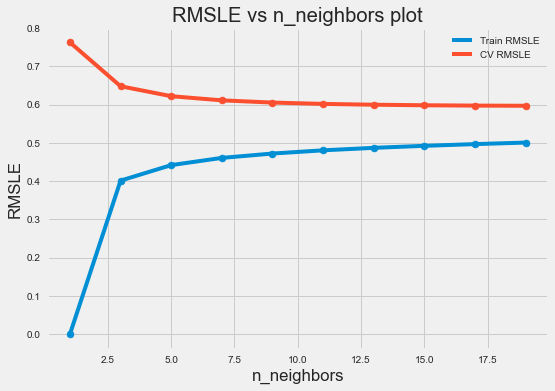

In [108]:
# plotting Score vs hyperparameter plot
cv_results = pd.read_csv(generated + 'KNN_cv_results.csv')
mean_train_score = -1 * cv_results.mean_train_score.values # -1 is to invert sign 
mean_test_score = -1 * cv_results.mean_test_score.values
n_neighbors = cv_results.param_n_neighbors.values
plt.plot(n_neighbors,mean_train_score,label='Train RMSLE')
plt.plot(n_neighbors,mean_test_score,label='CV RMSLE')
plt.scatter(n_neighbors,mean_train_score)
plt.scatter(n_neighbors,mean_test_score)
plt.xlabel('n_neighbors')
plt.ylabel('RMSLE')
plt.legend()
plt.title('RMSLE vs n_neighbors plot')
plt.show()

In [109]:
# best parameters
knn_cv.best_params_

{'n_neighbors': 19}

* **Training with best parameters**

In [114]:
knn = KNeighborsRegressor(n_neighbors=19,n_jobs=-1)
knn.fit(X_train,np.log1p(y_train))
# saving model 
pickle.dump(knn, open(generated + 'knn_model', 'wb'))

In [115]:
# loading model
knn = pickle.load(open(generated + 'knn_model', 'rb'))
# predicting
y_pred = knn.predict(X_val)
RMSLE = rmsle(y_true=y_val,y_pred=np.expm1(y_pred))

In [116]:
print('RMSLE for KNeighborsRegressor:-',RMSLE)

RMSLE for KNeighborsRegressor:- 0.5257479298169131


* **Training with whole data and predicting**

In [6]:
knn = KNeighborsRegressor(n_neighbors=19,n_jobs=-1)
knn.fit(train,np.log1p(y))
# saving model 
pickle.dump(knn, open(generated + 'knn_model_final', 'wb'))

In [20]:
y_test = knn.predict(test)
y_test = np.expm1(y_test) - 1 # to balance the 1, which is added before taking log
y_test[y_test<0] = 0

submission = pd.read_csv(official + 'sample_submission.csv')
submission.drop(columns='visitors',inplace=True)
submission['visitors'] = y_test
submission.to_csv(generated + 'knn_submission.csv',index=False)

## 2.SGDRegression

* **Hyperparameter tuning**

In [228]:
# standardising data
std = StandardScaler() 
X_train_std = std.fit_transform(X_train)
X_val_std = std.fit_transform(X_val)

In [229]:
sgd_reg = SGDRegressor()
# parameters
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
# cross validation
sgd_reg_cv = GridSearchCV(estimator=sgd_reg,
                      param_grid=parameters,
                      scoring=score,
                      n_jobs=-1,
                      cv=5,
                      verbose=10,
                      return_train_score=True)
sgd_reg_cv.fit(X_train_std,np.log1p(y_train))
# saving cv-results
pd.DataFrame(sgd_reg_cv.cv_results_).to_csv('SGD_reg_cv_ressults.csv',index=False)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   20.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   21.1s finished


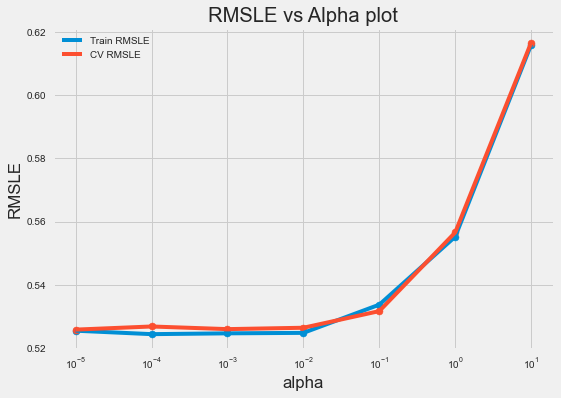

In [230]:
# hyperparameter vs score plot
cv_results = pd.read_csv('SGD_reg_cv_ressults.csv')
mean_train_score = -1 * cv_results.mean_train_score.values # -1 is to invert sign 
mean_test_score = -1 * cv_results.mean_test_score.values
alpha = cv_results.param_alpha.values
plt.plot(alpha,mean_train_score,label='Train RMSLE')
plt.plot(alpha,mean_test_score,label='CV RMSLE')
plt.scatter(alpha,mean_train_score)
plt.scatter(alpha,mean_test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSLE')
plt.legend()
plt.title('RMSLE vs Alpha plot')
plt.show()

In [242]:
# best parameter
sgd_reg_cv.best_params_

{'alpha': 0.0001}

* **Training with best parameter**

In [232]:
# model
sgd = SGDRegressor(alpha=0.0001)
sgd.fit(X_train_std,np.log1p(y_train))
# saving model 
pickle.dump(sgd, open(generated + 'sgd_model', 'wb'))

In [233]:
# loading model
sgd = pickle.load(open(generated + 'sgd_model', 'rb'))
y_pred = sgd.predict(X_val_std)
RMSLE = rmsle(y_true=y_val,y_pred=np.expm1(y_pred))

In [234]:
print('RMSLE for SGDRegressor:-',RMSLE)

RMSLE for SGDRegressor:- 0.5363733728734933


* **Training with whole data and predicting**

In [8]:
# standardising data
std = StandardScaler() 
train_std = std.fit_transform(train)
test_std = std.fit_transform(test)

In [9]:
# model
sgd = SGDRegressor(alpha=0.0001)
sgd.fit(train_std,np.log1p(y))
# saving model 
pickle.dump(sgd, open(generated + 'sgd_model_final', 'wb'))

In [21]:
y_test = sgd.predict(test_std)
y_test = np.expm1(y_test) - 1 # to balance the 1, which is added before taking log
y_test[y_test<0] = 0

submission = pd.read_csv(official + 'sample_submission.csv')
submission.drop(columns='visitors',inplace=True)
submission['visitors'] = y_test
submission.to_csv(generated + 'sgd_submission.csv',index=False)

## 3.DecisionTreeRegressor

* **Hyperparameter Tuning**

In [235]:
dt = DecisionTreeRegressor()
# hyperparameters
parameters = {'max_depth': [1, 5, 10, 50],
              'min_samples_split' : [5, 10, 100, 500]}
# cross validation
dt_cv = GridSearchCV(estimator=dt,
                      param_grid=parameters,
                      scoring=score,
                      n_jobs=-1,
                      cv=3,
                      verbose=10,
                      return_train_score=True)
dt_cv.fit(X_train,np.log1p(y_train))

# saving cv results

pd.DataFrame(dt_cv.cv_results_).to_csv('DecisionTreeRegressor_cv_result.csv')

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:  1.2min remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.2min finished


In [15]:
# hyperparameter vs score plot
cv_results = pd.read_csv('DecisionTreeRegressor_cv_result.csv')
param_max_depth = cv_results.param_max_depth.values
param_min_samples_split = cv_results.param_min_samples_split.values
mean_train_score =-1* cv_results.mean_train_score.values
mean_test_score =-1 * cv_results.mean_test_score.values
trace1 = go.Scatter3d(x=param_max_depth,y=param_min_samples_split,z=mean_train_score, name = 'train')
trace2 = go.Scatter3d(x=param_max_depth,y=param_min_samples_split,z=mean_test_score, name = 'Cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='RMSLE'),),title='RMSLE vs min_samples_split & max_depth')

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


In [63]:
# best parameters
dt_cv.best_params_

{'max_depth': 10, 'min_samples_split': 500}

* **Training with best parameters**

In [66]:
dt = DecisionTreeRegressor(max_depth = 10, min_samples_split = 500)
dt.fit(X_train,np.log1p(y_train))
# saving model 
pickle.dump(dt, open(generated + 'dt_model', 'wb'))

In [87]:
# loading model
dt = pickle.load(open(generated + 'dt_model', 'rb'))
y_pred = dt.predict(X_val_after)
RMSLE = rmsle(y_true=y_val,y_pred=np.expm1(y_pred))

In [88]:
print('Validation-RMSLE for DecisionTreeRegressor:-',RMSLE)

RMSLE for DecisionTreeRegressor:- 0.4972822157330859


* **Training with whole data and predicting**

In [17]:
train.shape,test.shape,y.shape

((252108, 116), (32019, 116), (252108,))

In [18]:
dt = DecisionTreeRegressor(max_depth = 10, min_samples_split = 500)
dt.fit(train,np.log1p(y))
# saving model 
pickle.dump(dt, open(generated + 'dt_model_final', 'wb'))

In [22]:
y_test = dt.predict(test)
y_test = np.expm1(y_test) - 1 # to balance the 1, which is added before taking log
y_test[y_test<0] = 0

submission = pd.read_csv(official + 'sample_submission.csv')
submission.drop(columns='visitors',inplace=True)
submission['visitors'] = y_test
submission.to_csv(generated + 'dt_submission.csv',index=False)

## 4.RandomForestRegressor

* **Hyperparameter Tuning**

In [ ]:
rf = RandomForestRegressor()
# hyperparameters
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators' : [5, 10, 50, 100, 250, 500]}
# cross validation
rf_cv = GridSearchCV(estimator=rf,
                     param_grid=parameters,
                     cv=3,
                     scoring=score,
                     return_train_score=True,
                     n_jobs=-1)
rf_cv.fit(X_train,np.log1p(y_train))

# saving cross validation results
pd.DataFrame(rf_cv.cv_results_).to_csv('RandomForestRegressor_cv_result.csv')

In [14]:
# hyperparameter vs score plot
cv_results = pd.read_csv('RandomForestRegressor_cv_result.csv')
param_max_depth = cv_results.param_max_depth.values
param_n_estimators = cv_results.param_n_estimators.values
mean_train_score = -1 * cv_results.mean_train_score.values
mean_test_score = -1 * cv_results.mean_test_score.values

trace1 = go.Scatter3d(x=param_n_estimators,y=param_max_depth,z=mean_train_score, name = 'Train')
trace2 = go.Scatter3d(x=param_n_estimators,y=param_max_depth,z=mean_test_score, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='RMSLE'),),title='RMSLE vs n_estimators & max_depth')

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [18]:
#best parameters
rf_cv.best_params_

{'max_depth': 50, 'n_estimators': 500}

* **Training with best parameter**

In [76]:
rf = RandomForestRegressor(max_depth = 50, n_estimators = 500, n_jobs=-1)
rf.fit(X_train,np.log1p(y_train))
# saving model 
pickle.dump(rf, open(generated + 'rf_model', 'wb'))

In [107]:
# loading model
#rf = pickle.load(open(generated + 'rf_model', 'rb'))
y_pred = rf.predict(X_val)
RMSLE = rmsle(y_true=y_val,y_pred=np.expm1(y_pred))

In [108]:
print('Validation-RMSLE of RandomForestRegressor:-',RMSLE)

Validation-RMSLE of RandomForestRegressor:- 0.4757688791817025


* **Training with whole data and predicting**

In [7]:
rf = RandomForestRegressor(max_depth = 50, n_estimators = 500, n_jobs=-1)
rf.fit(train,np.log1p(y))
# saving model 
#pickle.dump(rf, open(generated + 'rf_model', 'wb'))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [8]:
y_test = rf.predict(test)
y_test = np.expm1(y_test) - 1 # to balance the 1, which is added before taking log
y_test[y_test<0] = 0

submission = pd.read_csv(official + 'sample_submission.csv')
submission.drop(columns='visitors',inplace=True)
submission['visitors'] = y_test
submission.to_csv(generated + 'rf_submission.csv',index=False)

## 5.XGBoost

* **Hyperparameter Tuning**

In [70]:
# hyperparameters
parameters = {'learning_rate':[0.1,0.01,0.001],
              'min_child_weight':[0.8,0.9,1],
              'subsample':[0.5,0.6,0.7],
              'colsample_bytree':[0.3,0.4,0.5],
              'max_depth': [2,4,8]}

# XGBoost optimized matrix
train_matrix = xgb.DMatrix(data=X_train_after,label=np.log1p(y_train))
val_matrix = xgb.DMatrix(data=X_val_after,label=np.log1p(y_val))

# model
xgb_reg = xgb.XGBRegressor(tree_method='gpu_hist')

# cross validation
xgb_reg_cv = GridSearchCV(estimator=xgb_reg,
                     param_grid=parameters,
                     cv=3,
                     return_train_score=True,
                     n_jobs=-1,
                     scoring=score)
xgb_reg_cv.fit(X=X_train_after,y=np.log1p(y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 8]

In [71]:
# saving cross validation results
pd.DataFrame(xgb_reg_cv.cv_results_).to_csv('xgb_reg_cv.csv',index=False)

In [72]:
# best parameters
xgb_reg_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 0.8,
 'subsample': 0.7}

* **Training with best parameter**

In [238]:
# best parameters
parameters = {'objective':'reg:squarederror', # objective for regression
              'eval_metric':'rmse', # root mean squared error
              'learning_rate':0.01, 
              'min_child_weight':0.8,
              'subsample':0.7,
              'colsample_bytree':0.5,
              'max_depth': 8, 
              'tree_method':'gpu_hist'} # GPU optimized training

# optimized xgb.DMatrix
train_matrix = xgb.DMatrix(data=X_train,label=np.log1p(y_train))
val_matrix = xgb.DMatrix(data=X_val,label=np.log1p(y_val))

# training model
model = xgb.train(params=parameters,
                 dtrain=train_matrix,
                 evals=[(train_matrix,'train'),(val_matrix,'test')],
                 num_boost_round =1000)

[0]	train-rmse:2.41594	test-rmse:2.43355
[1]	train-rmse:2.39299	test-rmse:2.41036
[2]	train-rmse:2.37017	test-rmse:2.38717
[3]	train-rmse:2.34759	test-rmse:2.36417
[4]	train-rmse:2.32524	test-rmse:2.34147
[5]	train-rmse:2.30320	test-rmse:2.31924
[6]	train-rmse:2.28132	test-rmse:2.29702
[7]	train-rmse:2.25967	test-rmse:2.27497
[8]	train-rmse:2.23834	test-rmse:2.25338
[9]	train-rmse:2.21714	test-rmse:2.23174
[10]	train-rmse:2.19617	test-rmse:2.21028
[11]	train-rmse:2.17550	test-rmse:2.18932
[12]	train-rmse:2.15504	test-rmse:2.16860
[13]	train-rmse:2.13472	test-rmse:2.14798
[14]	train-rmse:2.11471	test-rmse:2.12779
[15]	train-rmse:2.09496	test-rmse:2.10782
[16]	train-rmse:2.07526	test-rmse:2.08778
[17]	train-rmse:2.05577	test-rmse:2.06790
[18]	train-rmse:2.03657	test-rmse:2.04836
[19]	train-rmse:2.01750	test-rmse:2.02894
[20]	train-rmse:1.99879	test-rmse:2.01008
[21]	train-rmse:1.98011	test-rmse:1.99119
[22]	train-rmse:1.96163	test-rmse:1.97234
[23]	train-rmse:1.94339	test-rmse:1.95387
[2

[194]	train-rmse:0.60010	test-rmse:0.59696
[195]	train-rmse:0.59809	test-rmse:0.59505
[196]	train-rmse:0.59611	test-rmse:0.59314
[197]	train-rmse:0.59421	test-rmse:0.59136
[198]	train-rmse:0.59229	test-rmse:0.58959
[199]	train-rmse:0.59046	test-rmse:0.58791
[200]	train-rmse:0.58862	test-rmse:0.58620
[201]	train-rmse:0.58681	test-rmse:0.58451
[202]	train-rmse:0.58502	test-rmse:0.58275
[203]	train-rmse:0.58330	test-rmse:0.58122
[204]	train-rmse:0.58156	test-rmse:0.57963
[205]	train-rmse:0.57990	test-rmse:0.57814
[206]	train-rmse:0.57827	test-rmse:0.57662
[207]	train-rmse:0.57662	test-rmse:0.57508
[208]	train-rmse:0.57498	test-rmse:0.57352
[209]	train-rmse:0.57337	test-rmse:0.57202
[210]	train-rmse:0.57182	test-rmse:0.57064
[211]	train-rmse:0.57032	test-rmse:0.56933
[212]	train-rmse:0.56878	test-rmse:0.56797
[213]	train-rmse:0.56732	test-rmse:0.56664
[214]	train-rmse:0.56588	test-rmse:0.56532
[215]	train-rmse:0.56446	test-rmse:0.56404
[216]	train-rmse:0.56306	test-rmse:0.56276
[217]	train

[385]	train-rmse:0.48123	test-rmse:0.49596
[386]	train-rmse:0.48109	test-rmse:0.49591
[387]	train-rmse:0.48099	test-rmse:0.49583
[388]	train-rmse:0.48087	test-rmse:0.49579
[389]	train-rmse:0.48076	test-rmse:0.49573
[390]	train-rmse:0.48065	test-rmse:0.49568
[391]	train-rmse:0.48052	test-rmse:0.49556
[392]	train-rmse:0.48040	test-rmse:0.49551
[393]	train-rmse:0.48027	test-rmse:0.49548
[394]	train-rmse:0.48017	test-rmse:0.49545
[395]	train-rmse:0.48007	test-rmse:0.49540
[396]	train-rmse:0.47998	test-rmse:0.49536
[397]	train-rmse:0.47987	test-rmse:0.49530
[398]	train-rmse:0.47977	test-rmse:0.49524
[399]	train-rmse:0.47965	test-rmse:0.49514
[400]	train-rmse:0.47955	test-rmse:0.49508
[401]	train-rmse:0.47943	test-rmse:0.49500
[402]	train-rmse:0.47934	test-rmse:0.49496
[403]	train-rmse:0.47920	test-rmse:0.49494
[404]	train-rmse:0.47912	test-rmse:0.49492
[405]	train-rmse:0.47902	test-rmse:0.49488
[406]	train-rmse:0.47891	test-rmse:0.49480
[407]	train-rmse:0.47881	test-rmse:0.49478
[408]	train

[576]	train-rmse:0.46773	test-rmse:0.49001
[577]	train-rmse:0.46769	test-rmse:0.49000
[578]	train-rmse:0.46764	test-rmse:0.48998
[579]	train-rmse:0.46760	test-rmse:0.48998
[580]	train-rmse:0.46752	test-rmse:0.48991
[581]	train-rmse:0.46747	test-rmse:0.48987
[582]	train-rmse:0.46743	test-rmse:0.48986
[583]	train-rmse:0.46739	test-rmse:0.48986
[584]	train-rmse:0.46735	test-rmse:0.48985
[585]	train-rmse:0.46731	test-rmse:0.48984
[586]	train-rmse:0.46723	test-rmse:0.48982
[587]	train-rmse:0.46718	test-rmse:0.48982
[588]	train-rmse:0.46715	test-rmse:0.48981
[589]	train-rmse:0.46710	test-rmse:0.48979
[590]	train-rmse:0.46705	test-rmse:0.48977
[591]	train-rmse:0.46699	test-rmse:0.48975
[592]	train-rmse:0.46695	test-rmse:0.48974
[593]	train-rmse:0.46691	test-rmse:0.48971
[594]	train-rmse:0.46686	test-rmse:0.48971
[595]	train-rmse:0.46683	test-rmse:0.48971
[596]	train-rmse:0.46680	test-rmse:0.48972
[597]	train-rmse:0.46676	test-rmse:0.48970
[598]	train-rmse:0.46670	test-rmse:0.48969
[599]	train

[767]	train-rmse:0.46013	test-rmse:0.48721
[768]	train-rmse:0.46009	test-rmse:0.48715
[769]	train-rmse:0.46007	test-rmse:0.48714
[770]	train-rmse:0.46003	test-rmse:0.48714
[771]	train-rmse:0.45999	test-rmse:0.48715
[772]	train-rmse:0.45996	test-rmse:0.48714
[773]	train-rmse:0.45992	test-rmse:0.48716
[774]	train-rmse:0.45989	test-rmse:0.48713
[775]	train-rmse:0.45987	test-rmse:0.48711
[776]	train-rmse:0.45984	test-rmse:0.48711
[777]	train-rmse:0.45982	test-rmse:0.48711
[778]	train-rmse:0.45978	test-rmse:0.48711
[779]	train-rmse:0.45976	test-rmse:0.48710
[780]	train-rmse:0.45973	test-rmse:0.48710
[781]	train-rmse:0.45970	test-rmse:0.48710
[782]	train-rmse:0.45966	test-rmse:0.48707
[783]	train-rmse:0.45961	test-rmse:0.48704
[784]	train-rmse:0.45958	test-rmse:0.48703
[785]	train-rmse:0.45955	test-rmse:0.48702
[786]	train-rmse:0.45951	test-rmse:0.48702
[787]	train-rmse:0.45946	test-rmse:0.48701
[788]	train-rmse:0.45944	test-rmse:0.48700
[789]	train-rmse:0.45938	test-rmse:0.48695
[790]	train

[958]	train-rmse:0.45395	test-rmse:0.48503
[959]	train-rmse:0.45392	test-rmse:0.48503
[960]	train-rmse:0.45388	test-rmse:0.48504
[961]	train-rmse:0.45384	test-rmse:0.48503
[962]	train-rmse:0.45382	test-rmse:0.48504
[963]	train-rmse:0.45379	test-rmse:0.48503
[964]	train-rmse:0.45377	test-rmse:0.48502
[965]	train-rmse:0.45375	test-rmse:0.48501
[966]	train-rmse:0.45372	test-rmse:0.48499
[967]	train-rmse:0.45369	test-rmse:0.48499
[968]	train-rmse:0.45365	test-rmse:0.48498
[969]	train-rmse:0.45363	test-rmse:0.48497
[970]	train-rmse:0.45359	test-rmse:0.48497
[971]	train-rmse:0.45355	test-rmse:0.48491
[972]	train-rmse:0.45350	test-rmse:0.48486
[973]	train-rmse:0.45345	test-rmse:0.48483
[974]	train-rmse:0.45342	test-rmse:0.48474
[975]	train-rmse:0.45338	test-rmse:0.48475
[976]	train-rmse:0.45336	test-rmse:0.48474
[977]	train-rmse:0.45331	test-rmse:0.48473
[978]	train-rmse:0.45327	test-rmse:0.48472
[979]	train-rmse:0.45325	test-rmse:0.48475
[980]	train-rmse:0.45321	test-rmse:0.48475
[981]	train

In [239]:
# saving model
model.save_model('XGB_model')

In [240]:
# root mean squared logarithemic error
RMSLE = rmsle(y_val,np.expm1(model.predict(val_matrix)))

In [243]:
print('Validation-RMSLE of GBDT (XGBoost):-',RMSLE)

Validation-RMSLE of GBDT (XGBoost):- 0.45453431438864467


* **Training with whole data and predicting**

In [4]:
# best parameters
parameters = {'objective':'reg:squarederror', # objective for regression
              'eval_metric':'rmse', # root mean squared error
              'learning_rate':0.01, 
              'min_child_weight':0.8,
              'subsample':0.7,
              'colsample_bytree':0.3,
              'max_depth': 8, 
              'tree_method':'gpu_hist'} # GPU optimized training

# optimized xgb.DMatrix
train_matrix = xgb.DMatrix(data=train,label=np.log1p(y))
test_matrix = xgb.DMatrix(data=test)

# training model
XGB_model = xgb.train(params=parameters,
                 dtrain=train_matrix,
                 num_boost_round =3500)

pickle.dump(XGB_model, open(generated + 'XGB_model', 'wb'))

In [11]:
y_test = XGB_model.predict(test_matrix)
y_test = np.expm1(y_test) - 1 # to balance the 1, which is added before taking log
y_test[y_test<0] = 0

submission = pd.read_csv(official + 'sample_submission.csv')
submission.drop(columns='visitors',inplace=True)
submission['visitors'] = y_test
submission.to_csv(generated + 'XGB_submission.csv',index=False)

## Observations:-

* **Validation Root Mean Square logarithemic Error of each model:-**

In [244]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Validation RMSLE"]

x.add_row(["KNeighborsRegressor",0.5257 ])
x.add_row(["SGDRegressor", 0.5363])
x.add_row(["DecisionTreeRegressor", 0.4972])
x.add_row(["RandomForestRegressor", 0.4757])
x.add_row(["XGBRegressor (GBDT)", 0.4545])
print(x)
    


+-----------------------+------------------+
|         Model         | Validation RMSLE |
+-----------------------+------------------+
|  KNeighborsRegressor  |      0.5257      |
|      SGDRegressor     |      0.5363      |
| DecisionTreeRegressor |      0.4972      |
| RandomForestRegressor |      0.4757      |
|  XGBRegressor (GBDT)  |      0.4545      |
+-----------------------+------------------+


* **The best RMSLE we got is 0.45 from XGBRegressor (GBDT) and hence XGBRegressor (GBDT) is the best model.**

## Kaggle Submission:-

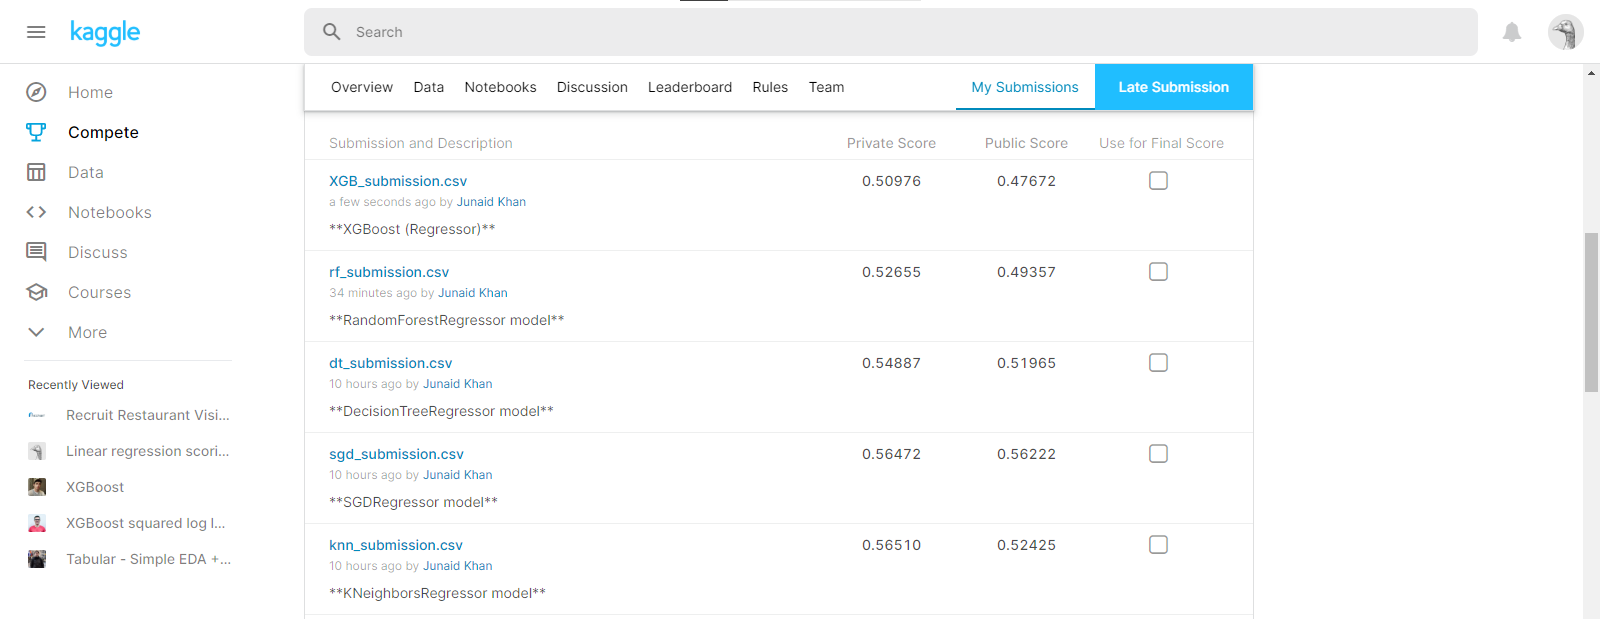

In [12]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Private Score", "Public Score"]

x.add_row(["KNeighborsRegressor",0.56510,0.52425 ])
x.add_row(["SGDRegressor", 0.56472,0.56222])
x.add_row(["DecisionTreeRegressor", 0.54887,0.51965])
x.add_row(["RandomForestRegressor", 0.52655,0.49357])
x.add_row(["XGBRegressor (GBDT)", 0.50976,0.47672])
print('Kaggle submission score for each model:-\n\n')
print(x)
    


Kaggle submission score for each model:-


+-----------------------+---------------+--------------+
|         Model         | Private Score | Public Score |
+-----------------------+---------------+--------------+
|  KNeighborsRegressor  |     0.5651    |   0.52425    |
|      SGDRegressor     |    0.56472    |   0.56222    |
| DecisionTreeRegressor |    0.54887    |   0.51965    |
| RandomForestRegressor |    0.52655    |   0.49357    |
|  XGBRegressor (GBDT)  |    0.50976    |   0.47672    |
+-----------------------+---------------+--------------+


* **For Kaggle submission, The best RMSLE from XGBRegressor (GBDT) and hence XGBRegressor (GBDT) is the best model for this problem.**